# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 2021546@novaims.unl.pt       | 2021546    |

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [3.1. Basic Statistics](#section_3_1)  #this need to be changed
    * [3.2. Inconsistencies](#section_3_2)
        * [3.2.1. Non Null Target](#sub_section_3_2_1)
        * [3.2.2. Checking Combinations of Code](#sub_section_3_2_2)
        * [3.2.3. Handling Average Weekly Wage Inconsistencies](#sub_section_3_2_3)
        * [3.2.4. Handling Birth Year Inconsistencies](#sub_section_3_2_4)
        * [3.2.5. Age at Injury vs. Birth Year](#sub_section_3_2_5)
        * [3.2.6. Age at Injury](#sub_section_3_2_6)
        * [3.2.7. First Hearing Date vs. Accident Date](#sub_section_3_2_7)
        * [3.2.8. C2 Date vs. C3 Date vs. Accident Date](#sub_section_3_2_8)
        * [3.2.9. Assembly Date vs. Accident Date](#sub_section_3_2_9)
        * [3.2.10. Handling ZIP Code Format](#sub_section_3_2_10)
        * [3.2.11. Gender Feature](#sub_section_3_2_11)
        * [3.2.12. Overview of Inconsistencies](#sub_section_3_2_12)
    * [Visualization](#section_3_3)  
* [4. Train Test Split](#chapter4)
* [5. Preprocessing the Data](#chapter5)
    * [5.1. Outliers](#section_5_1) 
    * [5.2. Missing Values](#section_5_2)  
    * [5.3. Categorical Features](#section_5_3) 
* [6. Feature Engineering](#chapter6)
    * [6.1. Carrier-District Interaction](#section_6_1)
    * [6.2. Income Category](#section_6_2)
    * [6.3. Has First Hearing Date](#section_6_3)
    * [6.4. Accident Quarter](#section_6_4)
    * [6.5. Accident Year](#section_6_5)
    * [6.6. Accident on Day and Weekend](#section_6_6)
    * [6.7. Age Group](#section_6_7)
    * [6.8. Time from Assembly Date to C-2 Filing](#section_6_8)
    * [6.9. Time from Accident to C-2 Filing](#section_6_9)
    * [6.10. ZIP Code Region](#section_6_10)
    * [6.11. Carrier Type Merged](#section_6_11)
    * [6.12. Carrier_Name_Simplified](#section_6_12)
    * [6.13. Body_Part_Category](#section_6_13)
    * [6.14. Injury_Nature_Category](#section_6_14)
    * [6.15. Injury_Cause_Category](#section_6_15)
* [7. Feature Selection](#chapter7)
    * [Scaling the Data](#section_7_1)  
    * [Numerical Features](#section_7_2) 
    * [Categorical Features](#section_7_3) 
    * [Final Features](#section_7_3)
* [8. Modeling](#chapter8) 

# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

In [125]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile

# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Feature Selection Methods ---
# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Machine Learning Models ---
from sklearn.tree import DecisionTreeClassifier

# --- Evaluation Metrics ---
from sklearn.metrics import classification_report, confusion_matrix

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>
Before importing the datasets, we unzip the data file to make it accessible for further processing.

In [126]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


Now we can proceed with loading the datasets.

In the following cell, we import the train and test datasets. The `Claim Identifier` column is set as the index for both datasets to ensure unique identification of claims.

In [127]:
df_train = pd.read_csv('../project_data/Data/train_data.csv', index_col='Claim Identifier')
df_test = pd.read_csv('../project_data/Data/test_data.csv',index_col='Claim Identifier')

To check that the imports really worked, we will use `.head()`.

In [128]:
df_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [129]:
df_test.head(2)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


## 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
In this chapter, we will perform initial exploratory steps to understand the structure and basic characteristics of our dataset.


## 3.1. Basic Statistics 📊 <a class="anchor" id="section_3_1"></a>

The `info()` method provides a summary of the dataframe, including column types, non-null counts, and memory usage.

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

*Some conclusions from the output above:*

- Some data types need to be changed, such as:
  - `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'` can be converted to datetime.
  - `'Industry Code'`, `'Zip Code'`, `'WCIO Part of Body Code'`, `'WCIO Cause of Injury Code'`, and `'WCIO Nature of Injury Code'` should be integers instead of floats. We will handle missing values before converting them.
  - Similarly, `'Birth Year'` and `'Age at Injury'` will be converted after addressing missing values.
- We have some missing values (which will be handled in Section 4.1).
- The `'OIICS Nature of Injury Description'` column contains only missing values, so we can remove it from our dataset.

In [131]:
# Convert date columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')


In [132]:
# Convert specified columns to integer type, handling NaNs with nullable integer format
#int_columns = ['Industry Code', 'Zip Code', 'WCIO Part of Body Code', 'WCIO Cause of Injury Code', 
#               'WCIO Nature of Injury Code', 'Birth Year', 'Age at Injury']
#for col in int_columns:
    #df_train[col] = pd.to_numeric(df_train[col], errors='coerce').astype('Int64')


In [133]:
# Drop column with only missing values in train and test datasets
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      593471 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Type    

**Dataset Summary:**
- Key column types:
  - Datetime columns (5): `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'`.
  - Float columns (4): Including `'Average Weekly Wage'`, `'Age at Injury'`, etc.
  - Object columns (16): Including `'Carrier Name'`, `'District Name'`, etc.
- Missing values are present in several columns, which will require further handling.


In [135]:
# # # Convert object columns to category
# categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
#                        'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
#                        'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

# df_train[categorical_columns] = df_train[categorical_columns].astype('category')

In [136]:
# Example: Convert numerical columns stored as objects to float (if necessary)
# df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

The `describe()` method provides a summary of the dataset's numerical columns, showing statistics such as mean, minimum, maximum, and standard deviation. This helps us identify potential outliers, unusual values, and data distribution.


In [137]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982784,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574026.0,42.11427,0.0,31.0,42.0,54.0,117.0,14.256432
Assembly Date,593471,2021-07-19 03:25:38.260841728,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545375.0,491.088321,0.0,0.0,0.0,841.0,2828079.0,6092.91812
Birth Year,544948.0,1886.767604,0.0,1965.0,1977.0,1989.0,2018.0,414.644423
C-2 Date,559466,2021-07-16 20:11:19.865443328,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449891840,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150798,2022-03-19 05:07:38.218278400,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Industry Code,564068.0,58.645305,11.0,45.0,61.0,71.0,92.0,19.644175


**Observations:**
- An unusual minimum value of `-9` is observed in the `WCIO Part of Body Code` feature. We will investigate this further.
- Some columns have `NaN` for certain statistics, indicating potential missing or undefined values.


In [138]:
# Investigate rows where 'WCIO Part Of Body Code' is -9 to understand the corresponding description
df_train[df_train['WCIO Part Of Body Code'] == -9]['WCIO Part Of Body Description'].value_counts()


WCIO Part Of Body Description
MULTIPLE    42011
Name: count, dtype: int64

If the `-9` value represents a specific category (like "Unknown" or "Multiple"), we might choose to treat it accordingly in our analysis. Otherwise, it may need further cleaning.


In [139]:
#Check if Multiple is associated with other different code
df_train[df_train['WCIO Part Of Body Description'] == 'MULTIPLE']['WCIO Part Of Body Code'].value_counts()

WCIO Part Of Body Code
-9.0    42011
Name: count, dtype: int64

We identified a negative value (`-9`) in the `WCIO Part of Body Code` column and confirmed that it is not a valid code. Since all occurrences of `-9` correspond to the "Multiple" category in the description, we decided to replace it with a new code, `101`, to retain the information. We also changed the description from "Multiple" to "Nonclassifiable" to reflect this adjustment.


In [140]:
# Replace negative code (-9) with 101 and update description to 'Nonclassifiable'
df_train.loc[df_train['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_train.loc[df_train['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

# Apply the same transformation to the test dataset
df_test.loc[df_test['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_test.loc[df_test['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'


**Note:** We chose `101` as the new code for `WCIO Part of Body Code` values of `-9` to ensure they are treated as a distinct category in further analysis, without conflicting with existing valid codes.


In [141]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


Using the `describe()` method for object-type features, we gained insights into categorical data. Key observations:

- `Claim Injury Type` and `Carrier Type` have numeric values that could be recoded or binned if necessary.
- Some features, like `COVID-19 Indicator` and `WCB Decision`, have only two unique values, indicating they could be converted to binary format.
- `WCB Decision` contains only a single unique value across all records, suggesting it might not add value to the analysis and warrants further investigation.


In [142]:
# Check the distribution of unique values in 'WCB Decision' to assess its utility
df_train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

In [143]:
df_train['WCB Decision'].isnull().sum()

np.int64(19445)

Since `WCB Decision` contains only a single unique value, we will choose to drop this column in the data cleaning process as it does not provide any variability for analysis.


In [144]:
df_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'],
      dtype='object')

In [145]:
df_train = df_train.drop(['WCB Decision'], axis=1)

#### Now let's clean the **text variables**.

Now, we’ll clean the text variables by removing numeric prefixes from `Carrier Type` and `Claim Injury Type` to make the values more interpretable and consistent.


In [146]:
df_train['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [147]:
df_train['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [148]:
# Remove numeric prefix from 'Carrier Type' in df_train
df_train['Carrier Type'] = df_train['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

# Apply the same transformation to the test set
df_test['Carrier Type'] = df_test['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

**Summary of Changes:**
- Removed numeric prefixes from `Carrier Type` for clarity.
- Both variables now contain only descriptive text, making them easier to interpret in further analysis.

#### Let's check for the **binary ones**.
Let's examine the binary variables in our dataset to ensure they are clean and consistent. For variables with unexpected values, such as `Alternative Dispute Resolution`, we will decide on the best way to handle them.


In [149]:
df_train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

Since there are only 5 rows where `Alternative Dispute Resolution` is `'U'`, we have two options: either delete these rows or assign `'NaN'` to these values. 

In this case, we’ll assign as NaN values, to avoid deleting rows in the test set.


In [150]:
# Replace 'U' with NaN in 'Alternative Dispute Resolution' column for training set
df_train['Alternative Dispute Resolution'] = df_train['Alternative Dispute Resolution'].replace('U', np.nan)

# Apply the same change to the test set
df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].replace('U', np.nan)

In [151]:
df_train['Attorney/Representative'].value_counts()

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64

In [152]:
df_train['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64

To standardize our binary columns, we will map `N` to `0` and `Y` to `1` in columns such as `Attorney/Representative`, `COVID-19 Indicator`, and `Alternative Dispute Resolution`.

In [153]:
# Map binary columns to 0 and 1 in training data
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Alternative Dispute Resolution']
for col in binary_columns:
    df_train[col] = df_train[col].map({'N': 0, 'Y': 1})
    
    # Apply the same transformation to the test set
    df_test[col] = df_test[col].map({'N': 0, 'Y': 1})

The `var()` method allows us to check if any numerical variables are univariate (variance is equal to 0). Columns with zero variance provide no predictive power and can be removed.

In [154]:
# Select only numerical columns for variance check
numerical_cols = df_train.select_dtypes(include=['number'])

# Calculate variance of each numerical column
numerical_cols.var()

Age at Injury                     2.032459e+02
Alternative Dispute Resolution    4.524480e-03
Attorney/Representative           2.163638e-01
Average Weekly Wage               3.712365e+07
Birth Year                        1.719300e+05
COVID-19 Indicator                4.564529e-02
IME-4 Count                       8.021942e+00
Industry Code                     3.858936e+02
WCIO Cause of Injury Code         6.694784e+02
WCIO Nature of Injury Code        4.931740e+02
WCIO Part Of Body Code            5.353025e+02
Agreement Reached                 4.448758e-02
Number of Dependents              4.003206e+00
dtype: float64

We'll remove rows that have missing values in our target variable, `Claim Injury Type`, as they are not useful for our analysis.

In [155]:
# Drop rows with missing values in the target column ('Claim Injury Type')
df_train = df_train.dropna(subset=['Claim Injury Type'])

**Binary Variables Summary**

In this section, we performed the following steps to clean and standardize the binary variables in our dataset:

1. **Identification and Mapping of Binary Columns**:
   - We identified `Attorney/Representative`, `COVID-19 Indicator`, and `Alternative Dispute Resolution` as binary columns with values of `N` and `Y`.
   - To standardize these columns, we mapped `N` to `0` and `Y` to `1` for consistency and easier processing in future analyses.

2. **Handling Irregular Values in `Alternative Dispute Resolution`**:
   - The `Alternative Dispute Resolution` column contained five rows with the value `'U'`, which did not fit the binary `N`/`Y` format.
   - Given the small number of occurrences, we chose to remove these rows from both the training and test datasets to maintain binary consistency.

3. **Variance Check for Numerical Columns**:
   - We calculated the variance of all numerical columns to identify any that were univariate (variance equal to 0).
   - Columns with zero variance provide no predictive value and could be candidates for removal in future steps.

4. **Handling Missing Values in Target Variable**:
   - We removed rows with missing values in the target variable, `Claim Injury Type`, as these rows would not contribute to the model’s training and evaluation.

These cleaning steps ensure that our binary variables are consistent and prepared for further analysis, while unnecessary data rows are removed to maintain data quality.

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
In this section, we will identify and address data inconsistencies to enhance the quality of our dataset for analysis. Specifically, we will ensure that the target variable, `Claim Injury Type`, has no missing values.


In [156]:
# Create a copy of df_train to work on without altering the original data
df = df_train.copy()

### 3.2.1. Non Null Target <a class="anchor" id="sub_section_3_2_1"></a>

Since `Claim Injury Type` is our target variable, we need to ensure there are no missing values in this column, as they could affect model performance.

In [157]:
df['Claim Injury Type'].isna().sum()

np.int64(0)

The output shows `0` missing values in `Claim Injury Type`, confirming that our target variable is complete.

Although no missing values were found, we include a line to drop rows with NaN in `Claim Injury Type` as a precaution in case of future updates to the dataset.


In [158]:
# Drop rows with missing values in 'Claim Injury Type' (if any exist)
df = df.dropna(subset=['Claim Injury Type'])

### 3.2.2. Checking Combinations of Code and Description <a class="anchor" id="sub_section_3_2_2"></a>
We need to verify that each `Code` corresponds uniquely to its respective `Description`. To achieve this, we created a function that takes the DataFrame, code column, and description column as inputs. The function counts the number of unique code-description combinations and compares it to the individual counts of the code and description columns. It also checks if the total unique combinations match the counts of each column, identifying any inconsistencies.


In [159]:
def check_code_description_combinations(df, code_column, description_column):
    # Count unique combinations of Code and Description
    unique_combinations = df[[code_column, description_column]].drop_duplicates()
    print(f"Number of unique combinations of {code_column} and {description_column}: {unique_combinations.shape[0]}")

    # Count total unique codes and descriptions individually
    code_count_sum = df[code_column].nunique()
    description_count_sum = df[description_column].nunique()

    print(f"Total unique {code_column} values: {code_count_sum}")
    print(f"Total unique {description_column} values: {description_count_sum}")

    # Check if the unique combination count matches the individual totals
    if code_count_sum == description_count_sum == unique_combinations.shape[0]:
        print(f"The number of unique combinations matches the total counts of {code_column} and {description_column}.")
    else:
        print(f"There is a discrepancy between the number of unique combinations and the total counts of {code_column} and {description_column}.")

**Note:** This function helps ensure data consistency by verifying that each code uniquely maps to a single description. It’s particularly useful for categorical data where one-to-one mapping between two columns is expected.

> #### Cause of Injury Code and  Description

We need to verify that each `Code` uniquely corresponds to its respective `Description`. This ensures consistency and avoids ambiguities in our dataset. To achieve this, we created a function that checks the number of unique code-description combinations and compares it to the individual counts of each column. If the counts do not match, it indicates potential inconsistencies, which we explore further to understand the cause.

In [160]:
# Call the function for different Code and Description columns
check_code_description_combinations(df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Number of unique combinations of WCIO Cause of Injury Code and WCIO Cause of Injury Description: 78
Total unique WCIO Cause of Injury Code values: 77
Total unique WCIO Cause of Injury Description values: 74
There is a discrepancy between the number of unique combinations and the total counts of WCIO Cause of Injury Code and WCIO Cause of Injury Description.


The output shows that there is a discrepancy between the total number of unique combinations of `WCIO Cause of Injury Code` and `WCIO Cause of Injury Description` and the individual counts of each column. This discrepancy suggests that some descriptions may be linked to multiple codes, which we investigate further below.

In [161]:
# Loop through each unique description and check if it maps to multiple codes
for description, group in df.groupby('WCIO Cause of Injury Description'):
    unique_codes = group['WCIO Cause of Injury Code'].nunique()
    
    # If the description is linked to more than one code, print details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates())

Description 'OBJECT BEING LIFTED OR HANDLED' is linked to 3 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED
5393948                                17.0   OBJECT BEING LIFTED OR HANDLED
5393880                                66.0   OBJECT BEING LIFTED OR HANDLED
Description 'REPETITIVE MOTION' is linked to 2 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393091                                97.0                REPETITIVE MOTION
5398012                                94.0                REPETITIVE MOTION


**Conclusion:**
Our analysis confirmed that certain injury descriptions legitimately map to multiple codes. This structure aligns with the original reference data and indicates that the variations are intentional. We can proceed with confidence that our `Code` and `Description` columns are consistent with each other.<br>
Let's do the same for the others Code and Description.

> ### Nature of Injury Code and Description

We will verify if each `WCIO Nature of Injury Code` corresponds uniquely to its respective `WCIO Nature of Injury Description`. This check helps us ensure consistency in the code-description relationship.


In [162]:
check_code_description_combinations(df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')

Number of unique combinations of WCIO Nature of Injury Code and WCIO Nature of Injury Description: 57
Total unique WCIO Nature of Injury Code values: 56
Total unique WCIO Nature of Injury Description values: 56
There is a discrepancy between the number of unique combinations and the total counts of WCIO Nature of Injury Code and WCIO Nature of Injury Description.


The output indicates a discrepancy between the unique combinations of `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description`. This discrepancy likely arises due to `NaN` values, which can create additional unique combinations.

Since `NaN` values do not provide meaningful information, they do not impact the integrity of the code-description relationship for analysis purposes.

In [163]:
# Check if any descriptions are linked to multiple codes
for description, group in df.groupby('WCIO Nature of Injury Description'):
    unique_codes = group['WCIO Nature of Injury Code'].nunique()
    
    # If a description is linked to more than one code, print the details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates())

**Note:** The loop did not return any output because all the discrepancies involve `NaN` values. No descriptions were found to be linked to multiple codes.

**Conclusion:** This analysis confirms that the `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description` pairs are consistent, with the discrepancy attributed solely to `NaN` values. We can proceed with confidence that this column pair is accurately mapped.

> ### Part Of Body Code and Description

We will check if each `WCIO Part Of Body Code` uniquely corresponds to a single `WCIO Part Of Body Description`. This is essential to ensure that the descriptions consistently match their respective codes without ambiguity.


In [164]:
check_code_description_combinations(df_train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Number of unique combinations of WCIO Part Of Body Code and WCIO Part Of Body Description: 58
Total unique WCIO Part Of Body Code values: 57
Total unique WCIO Part Of Body Description values: 54
There is a discrepancy between the number of unique combinations and the total counts of WCIO Part Of Body Code and WCIO Part Of Body Description.


The output shows a discrepancy between the total unique combinations of `WCIO Part Of Body Code` and `WCIO Part Of Body Description` and the individual counts of each column. Further investigation reveals that certain descriptions, such as `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'`, are associated with multiple codes. This may indicate a broader categorization where each code represents specific contexts within the same general description.

In [165]:
for description, group in df.groupby('WCIO Part Of Body Description'):
    unique_codes = group['WCIO Part Of Body Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates())

Description 'DISC' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393781                             43.0                          DISC
5394136                             22.0                          DISC
Description 'SOFT TISSUE' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393980                             18.0                   SOFT TISSUE
5394179                             25.0                   SOFT TISSUE
Description 'SPINAL CORD' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393898                             23.0                   SPINAL CORD
5397921                             47.0      

The descriptions `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'` are linked to multiple codes, as shown above. Upon reviewing the original reference table, we confirmed that this is correct. Each code corresponds to a specific part of the body or injury type, explaining these variations.

In [166]:
# Drop description columns from both training and test datasets
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

# Apply the same drop to the test set
df_test = df_test.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

### 3.2.3.  Handling Average Weekly Wage Inconsistencies <a class="anchor" id="sub_section_3_2_3"></a>

The `Average Weekly Wage` variable is expected to have positive values, as it represents wages related to job insurances. Negative values would be illogical, and zero values may indicate missing or placeholder data that requires further investigation.


We first check if there are any negative values in the `Average Weekly Wage` column, as these would be logically incorrect.

In [167]:
# Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


In [168]:
# Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df_test[df_test['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


Next, we check for values equal to zero. While zero wages may not make sense in this context, they might represent missing data or placeholders that require further attention.

In [169]:
# Check for zero values in 'Average Weekly Wage', which may indicate placeholders or missing data
wage_null = df[df['Average Weekly Wage'] == 0]
print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 335450


In [170]:
# Check for zero values in 'Average Weekly Wage', which may indicate placeholders or missing data
wage_null = df_test[df_test['Average Weekly Wage'] == 0]
print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 316549


In [171]:
df_test.shape

(387975, 24)

The dataset contains a significant number of entries with zero wages (335,446 records). Given the nature of this dataset, zero wages are likely placeholders or missing values rather than actual wage data. We may consider imputing these values based on other relevant columns or filtering them out, depending on their impact on the analysis.

### 3.2.4. Handling Birth Year Inconsistencies <a class="anchor" id="sub_section_3_2_4"></a>

For the `Birth Year` variable, we expect realistic values. This means:
- Birth years should not be earlier than 1900, as records before this would be highly unusual.
- Birth years should not be beyond a certain limit (e.g., 2006) to account for minimum working ages.

Additionally, any entries with a birth year of `0` will be considered missing, as it is impossible for a person to have a birth year of zero.

First, we replace all instances of `0` in the `Birth Year` column with `NaN`, treating them as missing values. This helps us handle these entries more effectively in later data processing steps.

In [172]:
# Replace 0 values in 'Birth Year' with NaN using np.where
df['Birth Year'] = np.where(df['Birth Year'] == 0, np.nan, df['Birth Year'])

#Apply to the test set
df_test['Birth Year'] = np.where(df_test['Birth Year'] == 0, np.nan, df_test['Birth Year'])

Next, we check for entries with unrealistic birth years (those before 1940 or after 2006). These likely represent erroneous entries, as they fall outside the expected range for working individuals in our dataset. 

In [173]:
# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year_test= df_test[(df_test['Birth Year'] < 1940) | (df_test['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year_test.shape[0]}")

Number of unrealistic birth years: 874
Number of unrealistic birth years: 984


The dataset contains 874 entries with unrealistic birth years, which we will edit from the dataset to maintain data quality.

In [174]:
# Instead of dropping, replace unrealistic Birth Year entries with NaN
df.loc[birth_year.index, 'Birth Year'] = np.nan
df_test.loc[birth_year_test.index, 'Birth Year'] = np.nan

**Conclusion:** By handling missing and unrealistic values in the `Birth Year` column, we ensure that only plausible data remains, improving the reliability of our analysis.

### 3.2.5. Age at Injury vs. Birth Year <a class="anchor" id="sub_section_3_2_5"></a>

To ensure data consistency, we need to verify that the `Age at Injury` aligns with the calculated age based on `Birth Year` and `Accident Date`. This check helps identify any discrepancies, and we will correct the `Age at Injury` when it appears inconsistent.


We calculate the age based on `Birth Year` and `Accident Date` and compare it with the provided `Age at Injury`. Any differences between these two values indicate potential data entry errors.

In [175]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year
df_test['Accident Year'] = pd.to_datetime(df_test['Accident Date'], errors='coerce').dt.year


# Identify discrepancies between calculated age and given Age at Injury
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 242960


In [176]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 42.33%


The output shows that there are 242,959 discrepancies in `Age at Injury`, which accounts for approximately 42.39% of the dataset. Given the high number, we will assume that the discrepancies are due to errors in `Age at Injury` and recalculate this value.

In [177]:
# Calculate the age at injury by finding the difference between accident year and birth year
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

# Apply the same calculation to the test set
df_test['Age at Injury'] = df_test['Accident Year'] - df_test['Birth Year']

After recalculating `Age at Injury`, we check for any remaining missing values or unrealistic ages to ensure the accuracy of our data.

In [178]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[ 5.  8.  9. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 nan]


In [179]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df_test['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[ 9. 11. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 83. 84. nan]


In [180]:
df['Age at Injury'].isnull().sum()

np.int64(58216)

**Conclusion:** By recalculating `Age at Injury`, we have resolved discrepancies with `Birth Year` and `Accident Date`, resulting in a more consistent and accurate dataset.

### 3.2.6. Age at Injury <a class="anchor" id="sub_section_3_2_6"></a>

To maintain data quality, we need to identify and remove any unrealistic values in the `Age at Injury` column. Typically, we expect working ages to fall within a certain range, so we’ll treat ages below 16 and above 80 as potential outliers.


In [181]:
# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange.shape[0]}")

# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange_test = df_test[(df_test['Age at Injury'] < 16) | (df_test['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange_test.shape[0]}")

Number of age strange: 212
Number of age strange: 298


The results show that there are 212 entries with unrealistic `Age at Injury` values, which fall outside the expected range of 16 to 80 years. These entries are likely errors or outliers that could skew the analysis.

Based on the findings, we have decided to replace to NaN these entries from the dataset to improve data reliability.

In [182]:
# Instead of dropping, replace unrealistic Age at Injury entries with NaN
df.loc[age_strange.index, 'Age at Injury'] = np.nan
# Instead of dropping, replace unrealistic Age at Injury entries with NaN
df_test.loc[age_strange_test.index, 'Age at Injury'] = np.nan

**Conclusion:** By removing outliers in the `Age at Injury` column, we ensure that only realistic age values remain in the dataset, which will lead to more accurate analyses and modeling.

### 3.2.7. First Hearing Date vs. Accident Date <a class="anchor" id="sub_section_3_2_7"></a>

To ensure consistency, we need to verify that the `First Hearing Date` occurs after the `Accident Date`. An invalid hearing date that precedes the accident date would be illogical and likely indicates data entry errors.


We identify any entries where `First Hearing Date` is earlier than `Accident Date`. These cases are considered inconsistent and will be removed from the dataset.

In [183]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & 
                           (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates_test = df_test[(df_test['First Hearing Date'].notnull()) & 
                           (df_test['Accident Date'].notnull()) & 
                           (df_test['First Hearing Date'] < df_test['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates_test.shape[0]}")

Number of invalid hearing dates: 74
Number of invalid hearing dates: 9


The output shows that there are 74 entries with `First Hearing Date` preceding the `Accident Date`. We will edit these entries to maintain data integrity.

In [184]:
# Instead of dropping, replace invalid First Hearing Date entries with NaN
df.loc[invalid_hearing_dates.index, 'First Hearing Date'] = np.nan
# Instead of dropping, replace invalid First Hearing Date entries with NaN
df_test.loc[invalid_hearing_dates_test.index, 'First Hearing Date'] = np.nan

**Conclusion:** By removing entries with invalid `First Hearing Date` values, we ensure that hearing events occur in a logical sequence after the related accident, improving the quality of our data.

### 3.2.8. C2 Date vs. C3 Date vs Accident Date <a class="anchor" id="sub_section_3_2_8"></a>
For these dates, we established the following logical order:
- **C-2 Date** should occur before **C-3 Date** (tem de ter 1 semana de diferença).
- **C-2 Date** must also be after the **Accident Date** (tem de ser 2 anos depois).

These validations are essential to ensure chronological consistency within the dataset.

#### Step 1: Validate C-2 Date vs. C-3 Date
We first checked if the `C-2 Date` precedes the `C-3 Date` for all entries where both dates are present.

In [185]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")

# C2 must be before C3
df_invalid_c2_c3_test = df_test[(df_test['C-2 Date'].notnull()) & (df_test['C-3 Date'].notnull()) & 
                     (df_test['C-2 Date'] > df_test['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3_test.shape[0]}")

Number of invalid C2 vs. C3 dates: 75816
Number of invalid C2 vs. C3 dates: 34950


Result: We found 75,816 entries with C-2 Date occurring after C-3 Date.
Since this inconsistency is substantial, we decided not to delete these records but to flag this issue for further consideration.

In [186]:
# Calculate the percentage of rows with C-3 Date missing
percentage = (df['C-3 Date'].isnull().sum() / df.shape[0]) * 100
print(f"Percentage of missing C-3 dates: {percentage:.2f}%")

# Calculate the percentage of rows with C-3 Date missing
percentage_test = (df_test['C-3 Date'].isnull().sum() / df_test.shape[0]) * 100
print(f"Percentage of missing C-3 dates: {percentage_test:.2f}%")

Percentage of missing C-3 dates: 67.38%
Percentage of missing C-3 dates: 78.04%


Result: Approximately 67.36% of the C-3 Date values are missing.
Due to the high proportion of missing values, we have decided to remove this column in the Missing Values treatment section.

In [187]:
df['C-3 Date'].isnull().sum()
df_test['C-3 Date'].isnull().sum()

np.int64(302759)

Its very representative so we decided to not delete. Also the 'C-3 Date' has a lot of missing values, more than 68% so we will delete in Missing Values part. Also we will ignore this inconsistency.

In [188]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'Accident Year'],
      dtype='object')

In [189]:
# C2 must be after Accident Date
df_invalid_c2_accident = df[
    (df['C-2 Date'].notnull()) &
    (df['Accident Date'].notnull()) &
    (df['C-2 Date'] < df['Accident Date'])
]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

# C2 must be after Accident Date
df_invalid_c2_accident_test = df_test[
    (df_test['C-2 Date'].notnull()) &
    (df_test['Accident Date'].notnull()) &
    (df_test['C-2 Date'] < df_test['Accident Date'])
]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident_test.shape[0]}")

Number of invalid C2 vs. Accident dates: 982
Number of invalid C2 vs. Accident dates: 181


Result: We found 982 entries with C-2 Date occurring before Accident Date.
We have decided to edit these invalid entries to maintain data consistency.

In [190]:
# Instead of dropping, replace invalid C-2 Date entries with NaN
df.loc[df_invalid_c2_accident.index, 'C-2 Date'] = np.nan

# Instead of dropping, replace invalid C-2 Date entries with NaN
df_test.loc[df_invalid_c2_accident_test.index, 'C-2 Date'] = np.nan

**Conclusion:** In this section, we identified and addressed various date inconsistencies:

C-2 Date vs. C-3 Date: Flagged but retained due to the high occurrence of inconsistencies.

C-3 Date missingness: Will be removed in the missing values treatment phase.

C-2 Date vs. Accident Date: Edited inconsistent records to maintain logical chronology.

This approach ensures the dataset retains its logical and temporal coherence.

### 3.2.9. Assembly Date vs. Accident Date <a class="anchor" id="sub_section_3_2_9"></a>

To ensure logical consistency in our dataset, we checked that the **Assembly Date** occurs after the **Accident Date**. It would not make sense for an assembly process related to the accident to take place before the accident itself.

The code below identifies rows where **Assembly Date** is earlier than **Accident Date** and counts the number of such entries. If inconsistencies are found, we will remove these rows to maintain the chronological integrity of the data.


In [191]:
# Identify entries where Assembly Date is after Accident Date
# Filter rows where both Assembly Date and Accident Date are not null
# and Assembly Date is earlier than Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] < df['Accident Date'])]

# Print the number of identified invalid entries
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")

# Identify entries where Assembly Date is after Accident Date
# Filter rows where both Assembly Date and Accident Date are not null
# and Assembly Date is earlier than Accident Date
invalid_assembly_dates_test = df_test[(df_test['Assembly Date'].notnull()) & (df_test['Accident Date'].notnull()) & 
                            (df_test['Assembly Date'] < df_test['Accident Date'])]

# Print the number of identified invalid entries
print(f"Number of invalid assembly dates: {invalid_assembly_dates_test.shape[0]}")

Number of invalid assembly dates: 1407
Number of invalid assembly dates: 222


Since we found 1407 entries with **Assembly Date** occurring before the **Accident Date**, we decided to edit these entries to maintain chronological accuracy within the dataset.

In [192]:
# Instead of dropping, replace invalid Assembly Date entries with NaN
df.loc[invalid_assembly_dates.index, 'Assembly Date'] = np.nan
# Instead of dropping, replace invalid Assembly Date entries with NaN
df_test.loc[invalid_assembly_dates_test.index, 'Assembly Date'] = np.nan

### 3.2.10. Handling ZIP Code Format <a class="anchor" id="sub_section_3_2_10"></a>
To ensure ZIP codes are in a valid format, let's first check if there are any ZIP codes containing letters, as ZIP codes should typically contain only numbers.

In [193]:
# Convert 'Zip Code' column to string to ensure consistency
df['Zip Code'] = df['Zip Code'].astype(str)

# Identify ZIP codes that contain letters (A-Z) while ignoring NaN values
zip_codes_with_letters = df[df['Zip Code'].notna() & df['Zip Code'].str.contains(r'[A-Za-z]')]

# Print unique ZIP codes with letters (invalid format) for review
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K

**Explanation**

By ensuring that ZIP codes are in a numeric format, we found that some entries contain letters, which makes them invalid ZIP codes. We printed a list of these invalid formats to identify the extent of the issue.

We need to calculate and print the percentage of ZIP codes that contain letters to understand how prevalent this issue is.

In [194]:
# Calculate the percentage of ZIP codes that contain letters
percentage_with_letters = (zip_codes_with_letters.shape[0] / df.shape[0]) * 100

# Print the percentage for analysis
print(f"Percentage of ZIP codes with letters: {percentage_with_letters:.2f}%")

Percentage of ZIP codes with letters: 5.05%


The calculated percentage shows the proportion of ZIP codes that contain invalid characters (letters). This helps in determining whether these records require further cleaning.

In [195]:
df['Zip Code'].isnull().sum()

np.int64(0)

Perform the same in df_test

In [196]:
# Convert 'Zip Code' column to string to ensure consistency
df_test['Zip Code'] = df_test['Zip Code'].astype(str)

# Identify ZIP codes that contain letters (A-Z) while ignoring NaN values
zip_codes_with_letters_test = df_test[df_test['Zip Code'].notna() & df_test['Zip Code'].str.contains(r'[A-Za-z]')]

# Print unique ZIP codes with letters (invalid format) for review
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters_test['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'TN330' 'V6B2M' 'G0A3K' 'L9H 1' 'H1V3S' 'M3K2C' 'H1Z2Y' 'T2L1'
 'L1A 1' 'UNKNO' 'H1V2L' 'H3P2E' 'N2L 1' 'L7K 1' 'L1R 1' 'K9H6R' 'M5V 3'
 'N2A 2' 'K9J 0' 'T2S1A' 'L0R 2' 'L1V 3' 'L2N 3' 'V9Z 4' 'V6T1Z' 'V4W 2'
 'K0L 2' 'L2M44' 'L7L6N' 'M3K2B' 'M8W 0' 'L5H 1' 'L7M 4' 'L1G 7' 'T6X2V'
 'LW7C7' 'L7L 6' 'L8B 1' 'E15 4' 'L2H' 'V6B0S' 'BD 24' 'K4A3Y' 'ST19'
 'K6K-I' 'BS149' 'HA7 3' 'CF24' 'S7W1B' 'CB900' 'E3A-2' 'JMCHR' 'T6J0N'
 'M6K 3' 'K0E1E' 'L2H0N' 'V3H2H' 'H1G0A' 'T3E5B' 'V7M3H' 'R3L1B' 'K2A3B'
 'G5T' 'N6J2C' 'L3B1B' 'L6M5H' 'BB5 2' 'H1Z4M' 'N1T1W' 'L4E4Y' 'T3J3J'
 'SE19' 'V6Z' 'L6L 1' 'M4B1P' 'N1R 2' 'L7A 2' 'L9W 7' 'L9W 1' 'V4A 1'
 'L2W 1' 'HP169' 'L0S1R' 'L6H 3' 'L9C0B' 'M8W 1' 'H9J 3' 'L7L 3' 'L1J 5'
 'M6K 1' 'N0A 1' 'L0S1S' 'L3M 4' 'L3T5H' 'X8X8X' 'M5VOP' 'K0L2H' 'L1N7V'
 'P3N1S']


In [197]:
# Calculate the percentage of ZIP codes that contain letters
percentage_with_letters_test = (zip_codes_with_letters_test.shape[0] / df_test.shape[0]) * 100

# Print the percentage for analysis
print(f"Percentage of ZIP codes with letters: {percentage_with_letters_test:.2f}%")

Percentage of ZIP codes with letters: 5.06%


As we can see, these ZIP codes are invalid, and there are also instances where 'nan' is written instead of a real NaN value. Therefore, we will replace these invalid entries with NaN.

In [198]:
# Import regex for pattern matching
import re

# Replace invalid ZIP codes that contain letters or are 'nan' with NaN for df
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Do the same for df_test to maintain consistency in the test set
df_test['Zip Code'] = df_test['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Print confirmation message
print("Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.")

Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.


In [199]:
df['Zip Code'].isnull().sum()

np.int64(28982)

*Ensuring 5-Digit Format for ZIP Codes*

If the length of a ZIP code is 4 digits, add a leading zero to make it 5 digits for consistency.

In [200]:
# Define a function to standardize ZIP codes by adding leading zeros if necessary
def convert_zip_code(zip_code):
    if pd.isna(zip_code):
        return np.nan
    zip_code_str = str(zip_code).split('.')[0]  # Convert to string and remove decimal if float
    if len(zip_code_str) == 4:
        return zip_code_str.zfill(5)  # Add leading zero if length is 4
    return zip_code_str

# Apply the function to standardize ZIP codes in the dataset
df['Zip Code'] = df['Zip Code'].apply(convert_zip_code)

# Apply the function to the test set to ensure consistent formatting
df_test['Zip Code'] = df_test['Zip Code'].apply(convert_zip_code)

# Print some values to verify the changes in ZIP Code format
print(df['Zip Code'].unique())

['13662' '14569' '12589' ... '90241' '15143' '07122']


After validating and cleaning the ZIP code format, we ensure all entries are in a consistent 5-digit format by adding a leading zero to any 4-digit codes. This step ensures uniformity across the dataset, which is crucial for subsequent analysis or modeling.

These steps handle the ZIP code format issues and validate consistency across the dataset. 

### 3.2.11. Gender Feature <a class="anchor" id="sub_section_3_2_11"></a>

We identified that there are valid entries for the Gender feature, but there are also a few inconsistencies that need to be addressed.

In [201]:
# Display the unique values and their counts for the Gender column
df['Gender'].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

We observed that only 45 entries are labeled as 'X' in the Gender column. Since 'U' typically represents individuals who prefer not to disclose their gender, we will replace 'X' with 'U'.

In [202]:
# Replace 'X' with 'U' in the Gender column
df['Gender'] = df['Gender'].replace('X', 'U')

# Apply to the test set as well
df_test['Gender'] = df_test['Gender'].replace('X', 'U')

# Print the number of unique values in Gender to verify
print("Unique values in Gender after replacement:")
print(df['Gender'].value_counts())

Unique values in Gender after replacement:
Gender
M    335218
F    234051
U      4757
Name: count, dtype: int64


This process has helped to standardize the Gender feature values, which now contain only 'M', 'F', and 'U' as valid entries.

### 3.2.12. Overview of Inconsistencies <a class="anchor" id="sub_section_3_2_12"></a>
In this section, we will calculate the number of rows removed while handling missing values by comparing the original dataset (df_train) with the cleaned dataset (df).

In [203]:
# Calculate and print the percentage of increased NaN values
nan_increase = df.isna().sum().sum() - df_train.isna().sum().sum()  
print(f"Percentage of NaNs increased: {(nan_increase / df_train.size) * 100:.2f}%")

Percentage of NaNs increased: 0.19%


This gives us an overview of how much data was removed due to handling inconsistencies, ensuring that the impact on the dataset is minimal.

## 3.3. Visualization <a class="anchor" id="section_3_3"></a>
Now that we have treated the inconsistencies, we can use some basic visualizations like boxplots and histograms to better understand the distribution and potentially check for any other issues in our dataset.

Here, we think that we should separate the numerical data into the following categories:

- Continuous
- Discrete
- Categorical
- Text features

In [204]:
# Display summary statistics for all numerical columns
df.describe().T


,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892983296,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,515598.0,42.917443,16.0,31.0,42.0,54.0,80.0,13.590474
Alternative Dispute Resolution,574021.0,0.004545,0.0,0.0,0.0,0.0,1.0,0.067264
Assembly Date,572619,2021-07-19 22:53:13.381987072,2020-01-01 00:00:00,2020-10-27 00:00:00,2021-07-30 00:00:00,2022-04-20 00:00:00,2022-12-31 00:00:00,NaN
Attorney/Representative,574026.0,0.316597,0.0,0.0,0.0,1.0,1.0,0.465149
Average Weekly Wage,545375.0,491.088321,0.0,0.0,0.0,841.0,2828079.0,6092.91812
Birth Year,518993.0,1977.866459,1940.0,1967.0,1978.0,1989.0,2006.0,13.699174
C-2 Date,558484,2021-07-17 05:56:59.923936256,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-27 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449892096,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
COVID-19 Indicator,574026.0,0.047944,0.0,0.0,0.0,0.0,1.0,0.213648


Create plots that reflect the different categories of features, such as categorical, binary, discrete.

1. Categorical Columns: Plotting Frequency Distributions
For each categorical column, we can plot the frequency of the top values.

2. Binary Columns: Plotting the Counts of Values (N vs Y)
For binary columns, we will use a bar plot to show the counts of N and Y.

3. Discrete Columns: Plotting the Distribution of Discrete Values
For discrete columns, we can plot the frequency of each distinct value or group by bins if there are too many values.

4. Continuous Columns: Plotting Histograms
For continuous columns, a histogram can help visualize the distribution.

### Exploratory Data Analysis on Continuous Columns: Average Weekly Wage

We will start by analyzing the distribution of the `Average Weekly Wage`. The following code plots a histogram for this column, labeling the count of occurrences above each bar for better visualization.

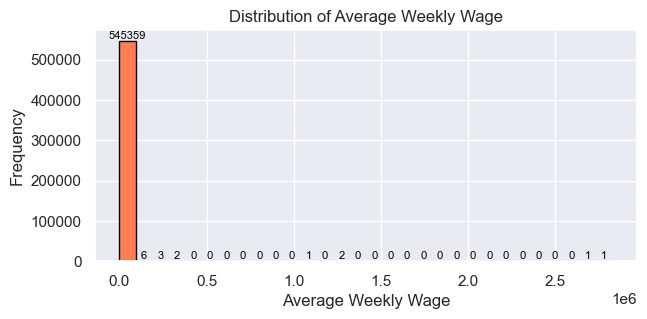

In [205]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    plt.figure(figsize=(7, 3))
    # Create histogram and store returned axes
    ax = df[column].plot(kind='hist', bins=30, color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        ax.annotate(f'{int(patch.get_height())}', 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The resulting plot shows the distribution of Average Weekly Wage. However, most of the values are concentrated at zero, indicating a high number of entries with no wage recorded.

To quantify this:

In [206]:
df['Average Weekly Wage'].shape[0]

574026

### Filtering Non-Zero Entries for Better Visualization

Since most values for Average Weekly Wage are zero, we will filter out the rows with Average Weekly Wage equal to zero to provide a clearer visualization of the non-zero values.

In [207]:
df[df['Average Weekly Wage'] > 3000.00].shape[0]

5125

Now, we will filter and plot the histogram excluding zero entries:

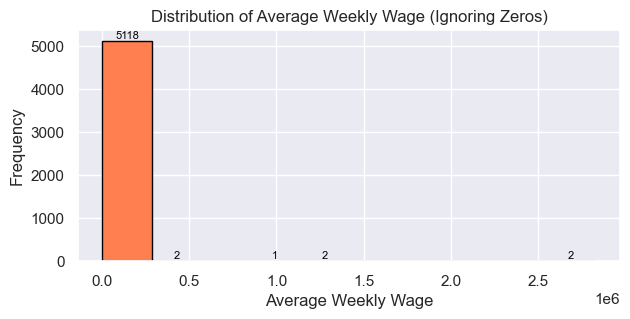

In [208]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars, Ignoring Zeros
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    # Filter out rows with value equal to zero
    filtered_data = df[df[column] > 3000.00]

    plt.figure(figsize=(7, 3))
    # Create histogram with filtered data and store returned axes
    ax = filtered_data[column].plot(kind='hist', color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        if patch.get_height() > 0:  # Only add labels if count is greater than 0
            ax.annotate(f'{int(patch.get_height())}', 
                        (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                        ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column} (Ignoring Zeros)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

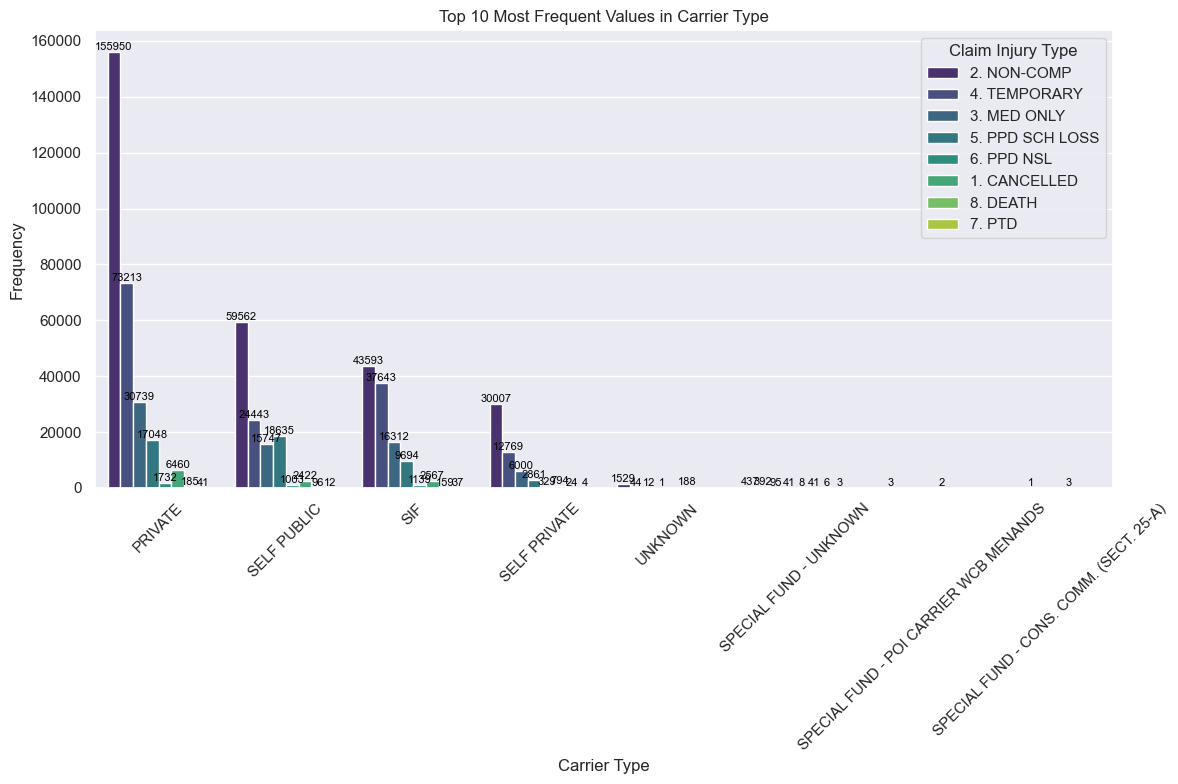

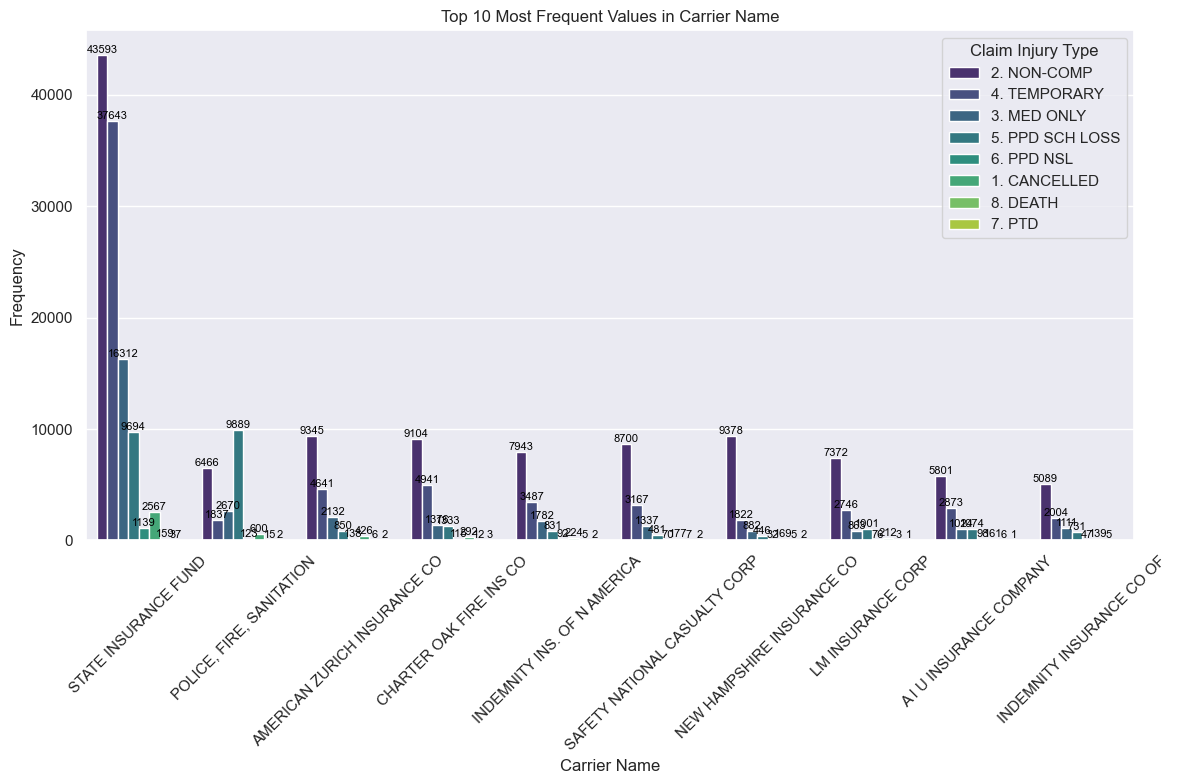

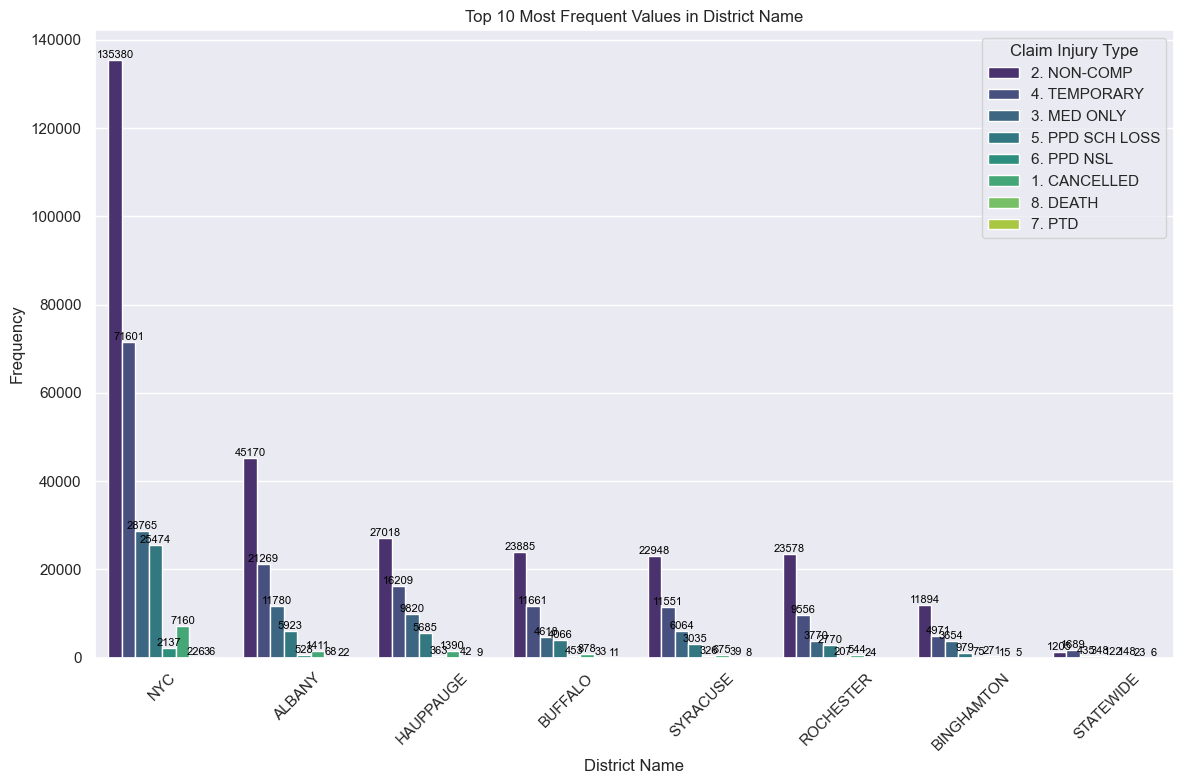

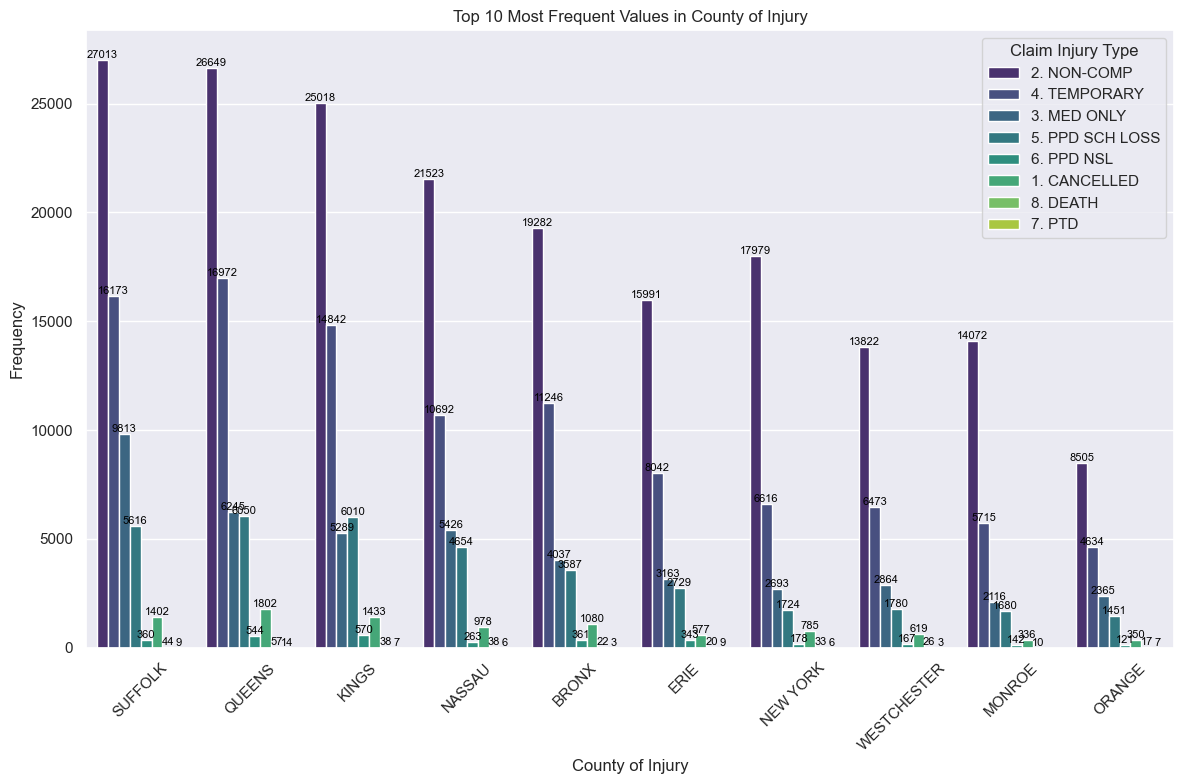

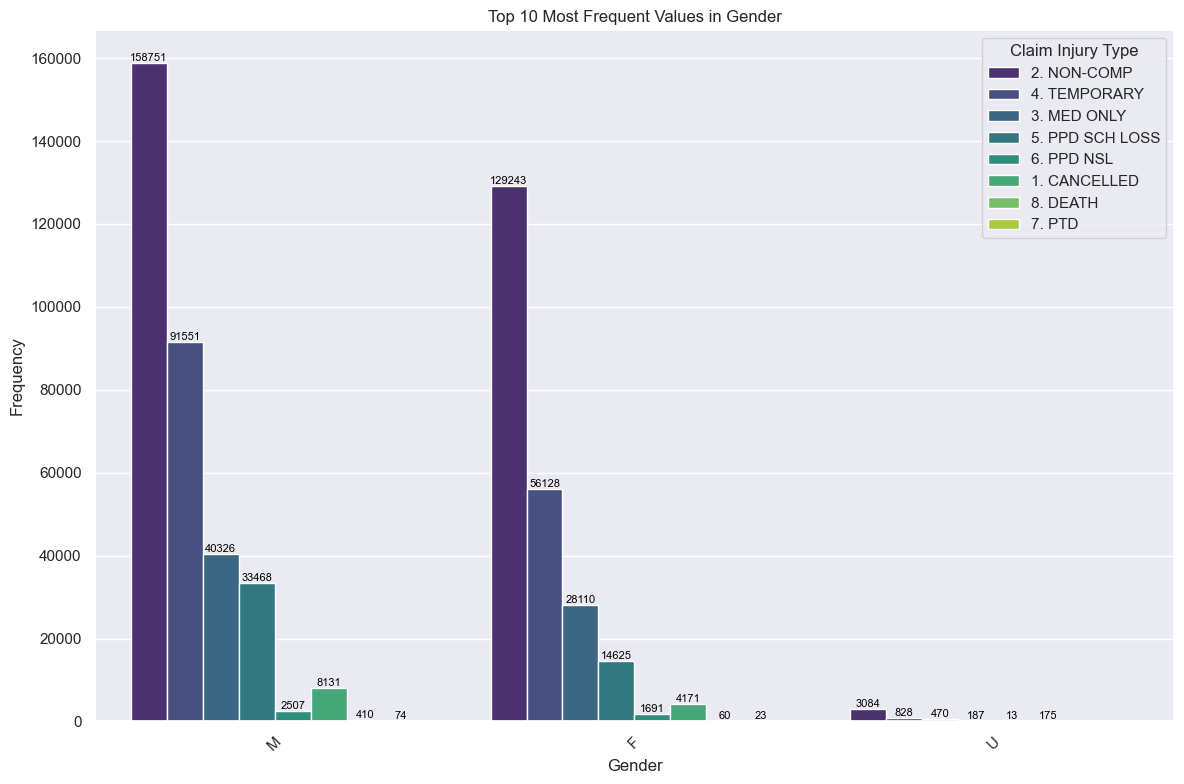

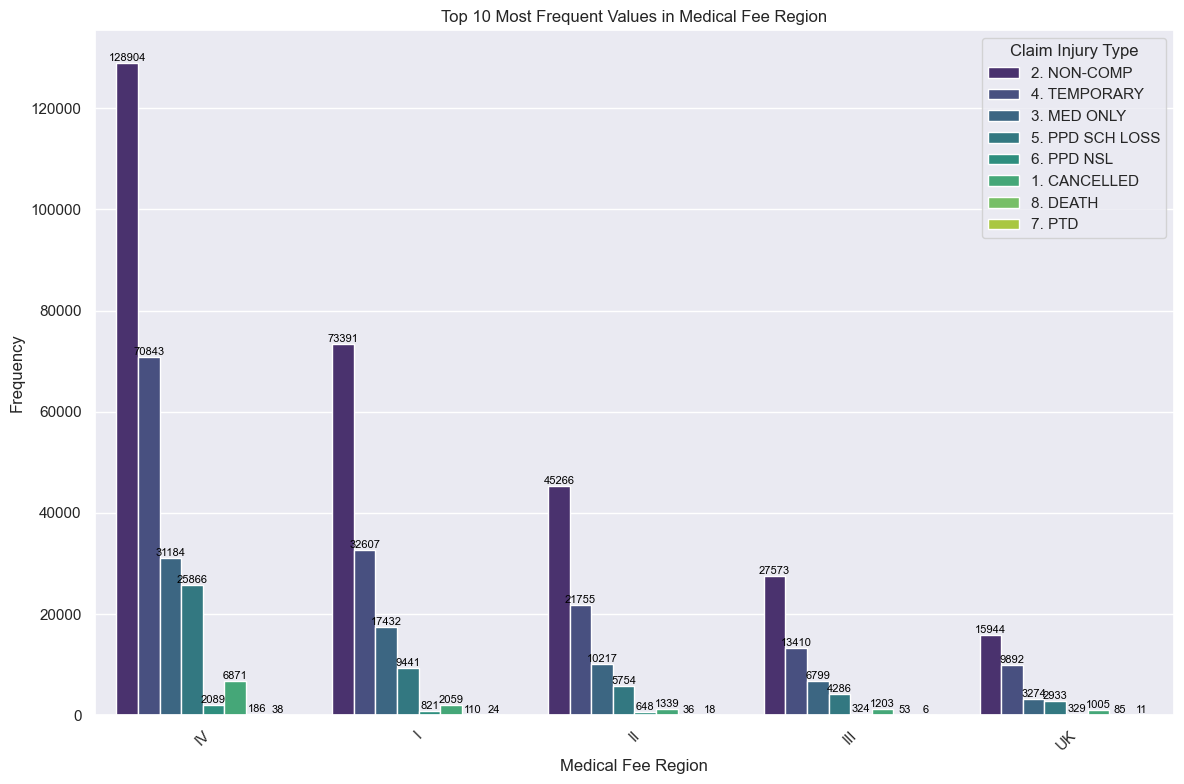

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Columns: Plotting Frequency Distributions with Target as Hue
categorical_columns = ['Carrier Type', 'Carrier Name', 'District Name', 'County of Injury', 'Gender', 'Medical Fee Region']

# Loop through categorical columns and create separate figures
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis', order=df[column].value_counts().iloc[:10].index)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

## Analysis of Categorical Variables

### 1. Carrier Type

The "Carrier Type" chart shows the distribution of claims across different carrier types with "Claim Injury Type" as the hue, indicating the frequency of each injury type within each carrier type. 

Observations:
- **Private** carriers have the highest number of claims, with a significant number of "NON-COMP" (Non-compensable) injury claims. This is followed by "TEMPORARY" claims.
- **Self-Public** and **Self-Private** carriers have notable numbers of "NON-COMP" and "TEMPORARY" injury types but at a much lower frequency than private carriers.
- "UNKNOWN" carrier type has a small number of claims distributed across various injury types, indicating possible data quality issues or lack of information.
  
Conclusion:
The private sector appears to handle the majority of claims, particularly for non-compensable injury types. Other carrier types have fewer claims, possibly due to the smaller scale or specific operational areas.

### 2. Carrier Name

The "Carrier Name" chart highlights the top 10 carriers by the number of claims with "Claim Injury Type" as the hue. 

Observations:
- **State Insurance Fund** is the leading carrier in terms of claim numbers, predominantly with "NON-COMP" and "TEMPORARY" injury claims.
- Other carriers, like **Police, Fire, Sanitation** and **American Zurich Insurance Co**, also have a high frequency of claims, but with varying distributions across injury types.
- There is a visible drop in claim numbers for carriers outside the top few, showing a long tail in the claim distribution.

Conclusion:
The State Insurance Fund handles a large volume of claims, potentially indicating its role as a major carrier in the region or its handling of a specific sector. Other carriers follow, but none reach the claim volume of the State Insurance Fund.


### 3. District Name

The "District Name" chart shows the distribution of claims by district, with "Claim Injury Type" displayed as the hue. 

Observations:
- **NYC** (New York City) has the highest claim frequency by a significant margin, mostly for "NON-COMP" and "TEMPORARY" injury types.
- **Albany** and **Hauppauge** follow, with much lower numbers but a similar distribution pattern across injury types.
- Other districts like **Buffalo** and **Rochester** show diverse injury types but with a focus on "NON-COMP".

Conclusion:
NYC is a major hub for claims, possibly due to its population density or the concentration of industries. The distribution across other districts suggests that claim volumes vary greatly by region, with injury type distributions remaining relatively consistent.

### 4. County of Injury

The "County of Injury" chart illustrates the top 10 counties by the number of claims, broken down by "Claim Injury Type".

Observations:
- **Suffolk** and **Queens** counties show the highest frequencies, particularly in "NON-COMP" and "TEMPORARY" injury types.
- The **Bronx** and **Kings** counties also report substantial claims, with similar injury type distributions to the leading counties.
- There is a steady decline in claim frequency as we move down the list of counties, with a more varied mix of injury types in counties with fewer claims.

Conclusion:
Certain counties like Suffolk and Queens lead in claim volumes, possibly due to larger populations or higher-risk industries. The injury type distribution remains largely similar across counties, highlighting regional patterns in claim types.

### 5. Gender

The "Gender" chart shows the distribution of claims by gender, with "Claim Injury Type" as the hue.

Observations:
- **Males (M)** have the highest number of claims, especially for "NON-COMP" and "TEMPORARY" injury types, followed by "MED ONLY".
- **Females (F)** also show significant claim numbers but at a notably lower volume than males, with a similar injury type distribution.
- Claims labeled with **U** (unspecified) gender are few but still show a diverse mix of injury types.

Conclusion:
Males have a significantly higher number of claims than females, which might suggest higher-risk roles or industries. Unspecified gender claims are minimal but should be considered for completeness.

### 6. Medical Fee Region

The "Medical Fee Region" chart illustrates the distribution of claims across different regions, with "Claim Injury Type" represented by the hue.

Observations:
- Regions **IV**, **I**, and **II** show the highest number of claims, with "NON-COMP" and "TEMPORARY" injury types being the most prevalent across these regions.
- The **UK** (United Kingdom) region also has a significant number of claims, which may indicate involvement in international cases or coverage for individuals/entities with connections to the UK.
- Region **III** has lower claim frequencies than IV, I, and II but still follows the same general pattern of injury types.
- The distribution across regions highlights that claims are concentrated in a few key areas, with a substantial number of cases likely linked to industry activities or regional policies in these zones.

Conclusion:
Regions IV, I, and II are central hubs for claims, potentially due to high industry density or specific regulatory policies that influence claim volumes. The presence of claims in the UK region indicates international aspects in the dataset, suggesting cross-border coverage or claims related to international entities.

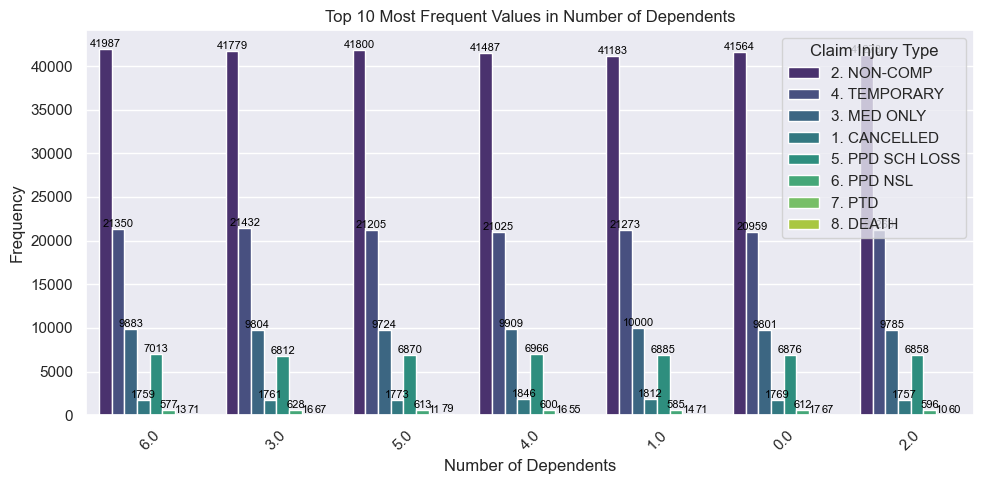

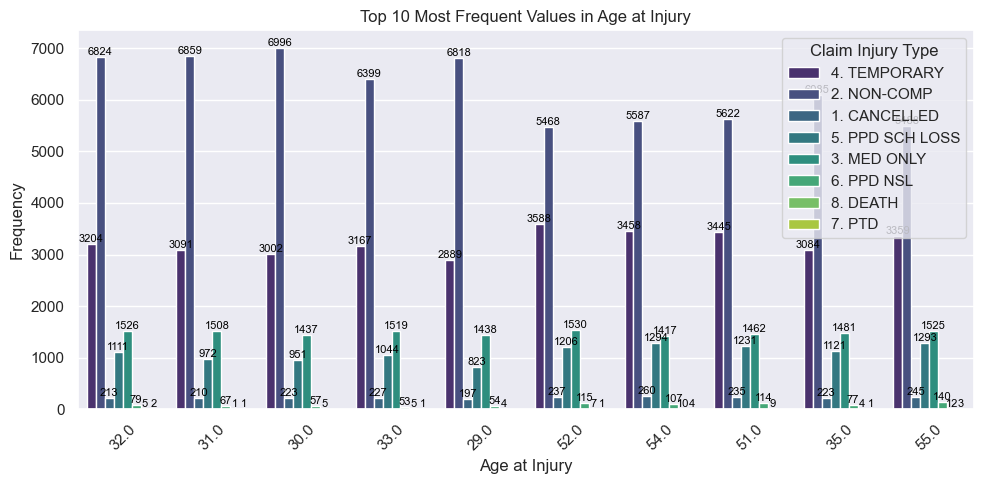

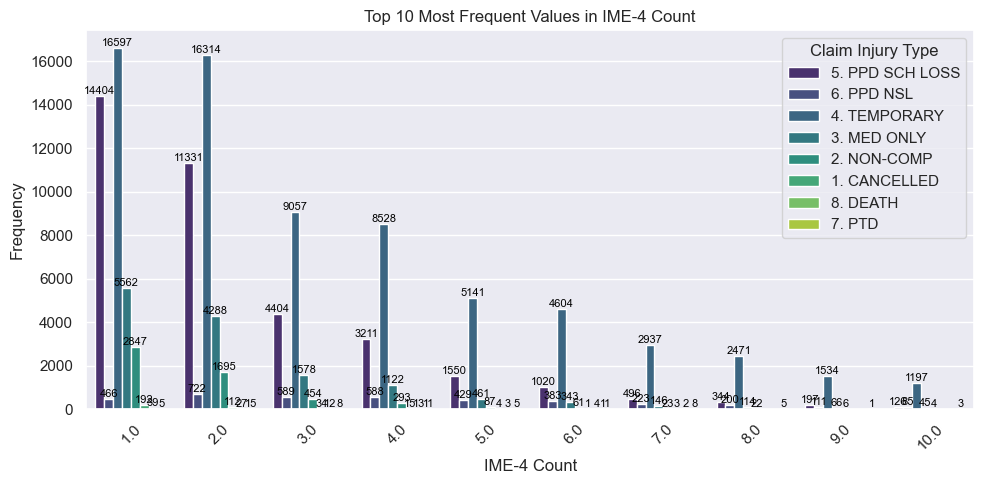

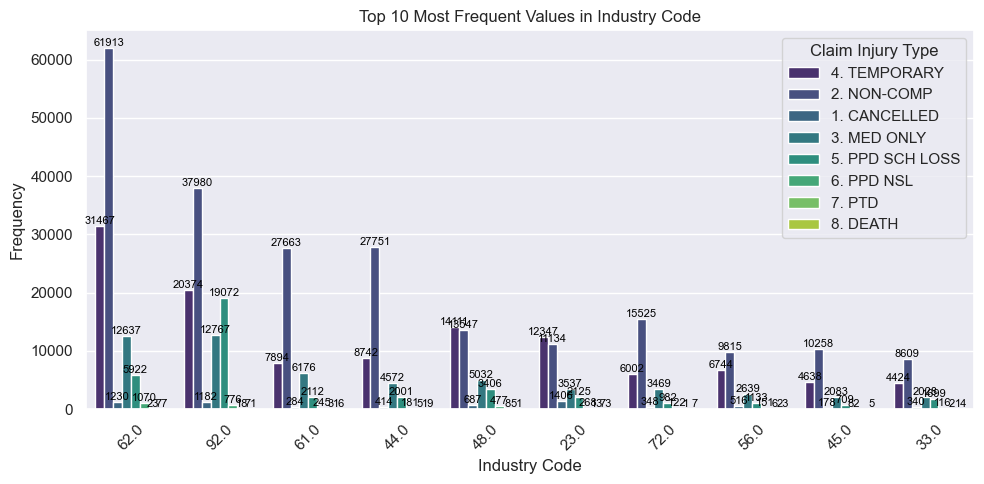

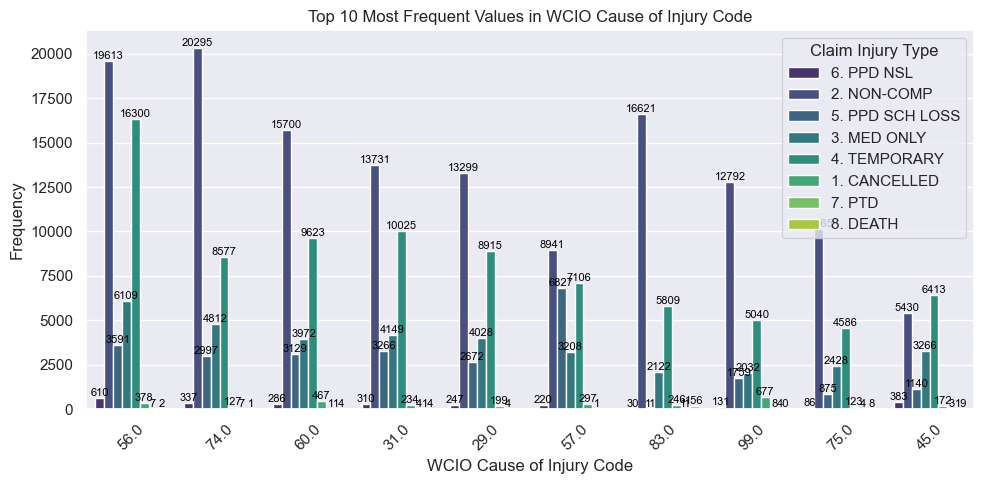

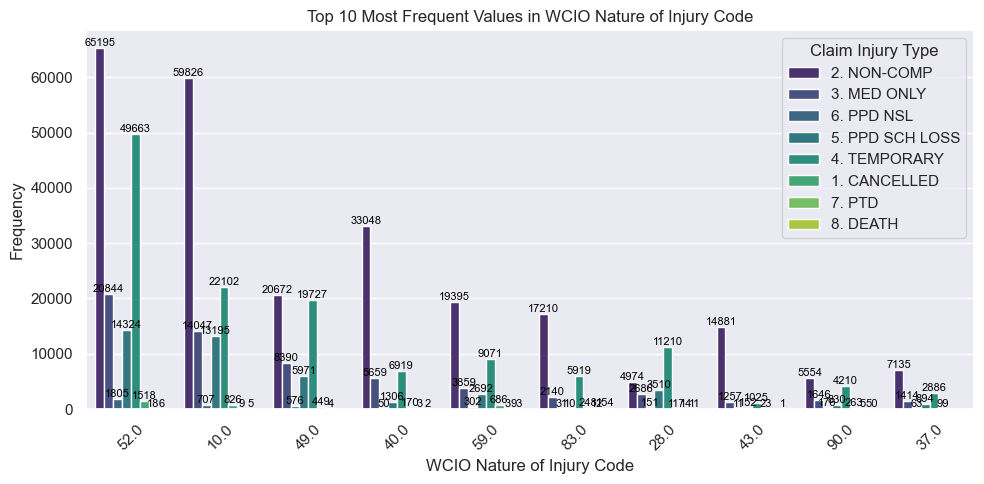

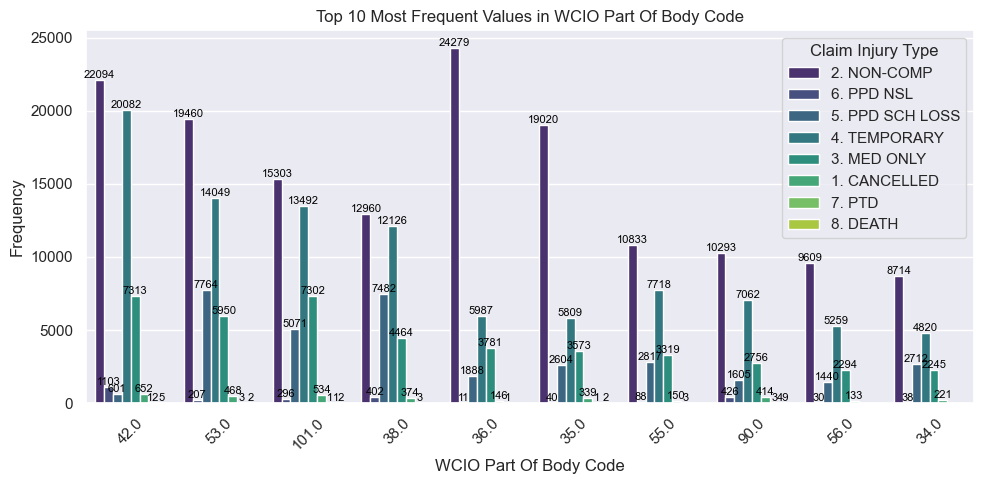

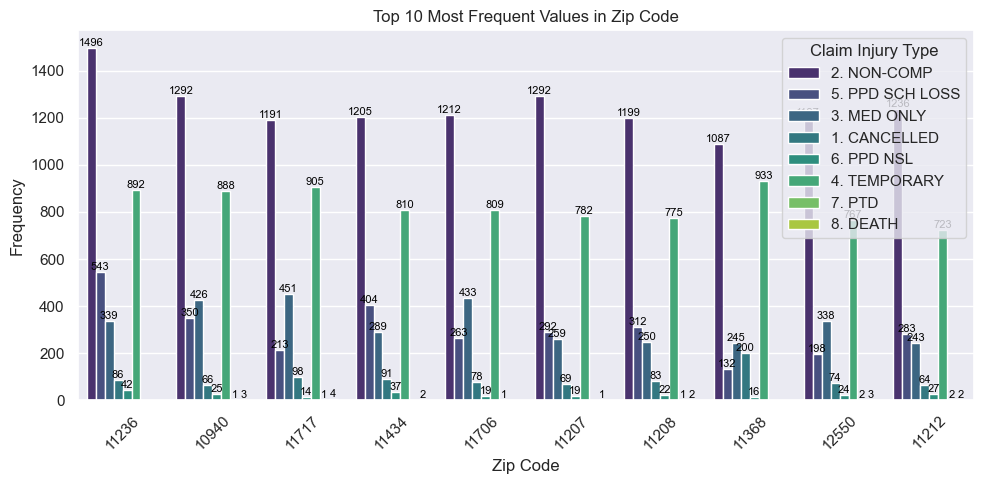

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete Columns: Plotting Top 15 Most Frequent Values with Target as Hue
discrete_columns = ['Number of Dependents', 'Age at Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code']

# Loop through discrete columns and create separate figures
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    
    # Select the top 10 most frequent values for the current column
    top_10_values = df[column].value_counts().nlargest(10).index
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df[df[column].isin(top_10_values)], x=column, hue='Claim Injury Type', palette='viridis', order=top_10_values)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

## Analysis of Discrete Variables

### 1. Number of Dependents
- **Insight**: The majority of records have `0`, `1`, or `2` dependents, with a significantly higher frequency in the `NON-COMP` claim injury type.
- **Distribution**: Higher counts of dependents are less common, with a steep drop after `3` dependents.
- **Claim Injury Type Distribution**: `NON-COMP` and `TEMPORARY` types are more common among records with `0` to `3` dependents, while other claim types appear relatively less frequently across all dependent numbers.

### 2. Age at Injury
- **Insight**: Ages around `32`, `52`, and `35` have the highest frequency, suggesting certain age groups may be more prone to injury in this dataset.
- **Claim Injury Type Trends**: Similar to other variables, the `NON-COMP` claim type dominates across all age groups, especially in the 30s and 50s.
- **Observations**: This could indicate specific age ranges where the workforce may be more susceptible to injuries, possibly due to experience or physical demands related to the work.

### 3. IME-4 Count
- **Insight**: The `IME-4 Count` values are highly concentrated around `1`, `2`, and `3`, showing a lower count as the value increases.
- **Claim Injury Type Distribution**: `TEMPORARY` and `PPD SCH LOSS` claim types are more common in cases with lower `IME-4 Count`, suggesting fewer medical evaluations for these injury types.
- **Trend**: Higher `IME-4 Count` values appear less frequently, indicating that the number of independent medical exams is limited for most claims.

### 4. Industry Code
- **Insight**: Codes `62.0`, `92.0`, and `61.0` are the most frequent, which may correspond to specific industries more prone to injuries.
- **Claim Type Distribution**: `NON-COMP` claims are notably high across these industry codes, showing that certain industries may have different injury claim distributions.
- **Observation**: Industries corresponding to these codes might have higher injury risks, warranting further investigation or preventive measures.

### 5. WCIO Cause of Injury Code
- **Insight**: Codes `56.0`, `74.0`, and `60.0` are the top causes of injuries, with varying distribution across claim types.
- **Claim Type Trends**: `MED ONLY` and `NON-COMP` types are more prevalent in these injury causes, possibly indicating the nature and severity associated with each code.
- **Observation**: Understanding which injury causes lead to `TEMPORARY` or `PPD` claims may help in assessing injury prevention efforts.

### 6. WCIO Nature of Injury Code
- **Insight**: `52.0` and `10.0` codes dominate in injury nature, which may represent specific injury types (like sprains, fractures, etc.).
- **Claim Type Distribution**: Consistently, `NON-COMP` is prevalent across these injury codes, though other types like `TEMPORARY` also appear frequently.
- **Observation**: This variable provides insight into the types of injuries commonly associated with higher claim counts.

### 7. WCIO Part of Body Code
- **Insight**: Parts `42.0` and `53.0` are the most affected, suggesting particular body parts are more prone to workplace injuries.
- **Claim Type Trends**: `TEMPORARY` claims are frequently associated with these body parts, possibly indicating less severe injuries that lead to temporary disability.
- **Observation**: This can guide ergonomic adjustments or protective equipment focus to reduce injuries in these body parts.

### 8. Zip Code
- **Insight**: Certain ZIP codes (`11236`, `10940`, etc.) have notably higher injury frequencies, which may point to geographic regions with higher claims.
- **Claim Type Distribution**: Distribution across claim types varies, with `NON-COMP` frequently leading in many of these areas.
- **Observation**: Regional analysis of injury claims can be insightful for targeted interventions or support in high-claim ZIP codes.

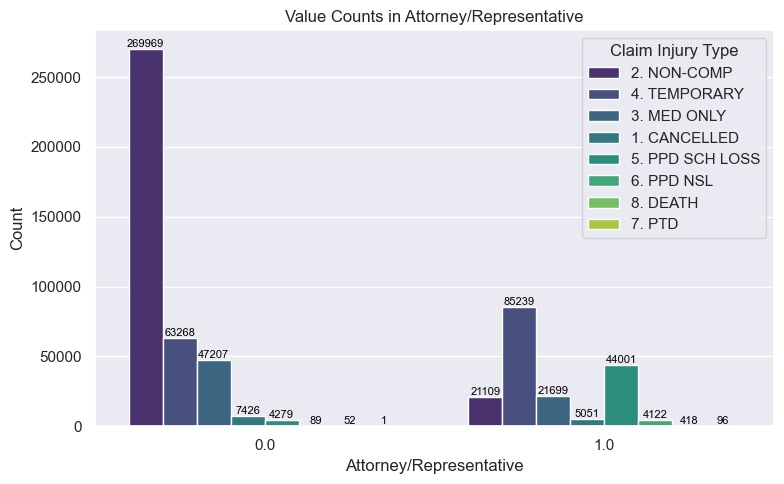

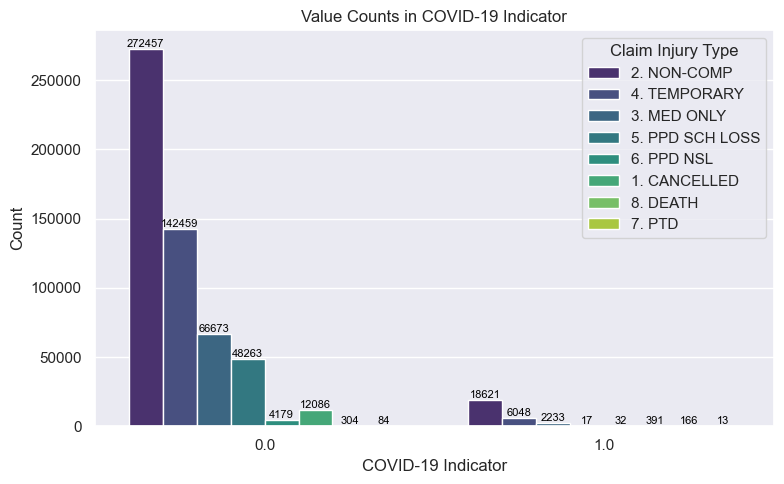

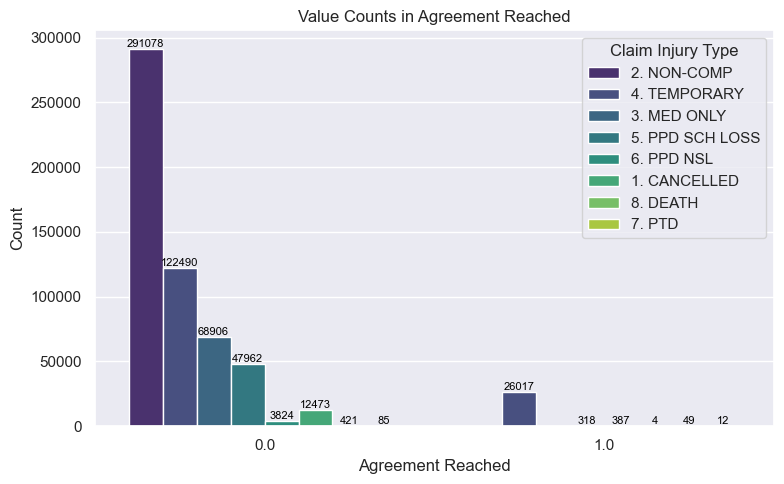

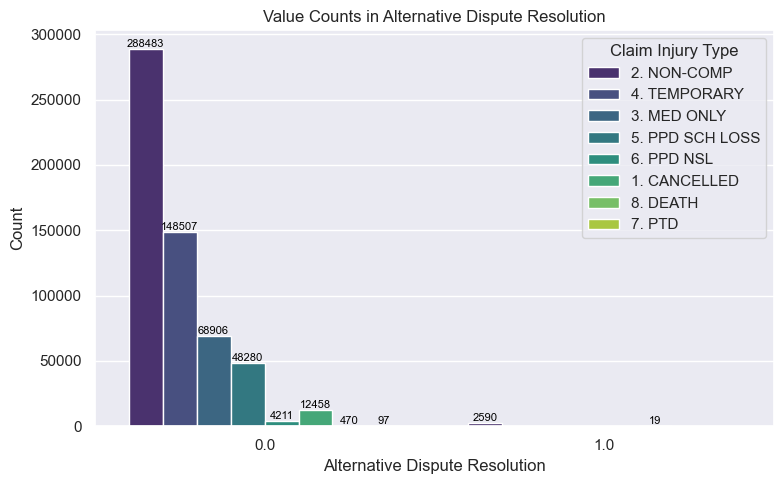

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Columns: Plotting Counts of Values with Target as Hue
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached','Alternative Dispute Resolution']

# Loop through binary columns and create separate figures
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis')
    
    # Set title and labels
    plt.title(f'Value Counts in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

## Analysis of Binary Variables


### Attorney/Representative

- This chart displays the count of cases based on whether they had an Attorney or Representative involved (`1`) or not (`0`).
- Cases without an attorney or representative are the majority, especially for the `NON-COMP` and `TEMPORARY` injury types.
- The presence of an attorney or representative is more common among cases with `TEMPORARY` and `MED ONLY` injury types but significantly lower in number than cases without representation across all injury types.

### COVID-19 Indicator

- This plot shows the distribution of cases based on whether they were associated with COVID-19 (`1`) or not (`0`).
- Cases not related to COVID-19 dominate across all injury types, with a significant majority in `NON-COMP` and `TEMPORARY` injury types.
- COVID-19-related cases are present but in much smaller numbers, primarily impacting `NON-COMP` and `TEMPORARY` injury types.

### Agreement Reached

- This chart illustrates whether an agreement was reached (`1`) or not (`0`) in claims across different injury types.
- The majority of cases did not reach an agreement, with a high count in the `NON-COMP`, `TEMPORARY`, and `MED ONLY` categories.
- Cases where an agreement was reached are relatively fewer but still show some presence, mainly in `TEMPORARY` and `MED ONLY` injury types.

### Alternative Dispute Resolution

- This plot represents the use of alternative dispute resolution (ADR) in claims, indicating `1` if used and `0` otherwise.
- ADR was not utilized in the majority of cases, with high counts for `NON-COMP` and `TEMPORARY` injury types.
- For cases where ADR was employed, it is relatively more common in `TEMPORARY` and `MED ONLY` injury types, although the numbers are still low compared to cases without ADR.

# 4. Train Test Split <a class="anchor" id="chapter4"></a>

Splitting the dataset into training and test sets is a crucial step in building a machine learning model. In this project, we perform the train-test split after correcting inconsistencies but before data preprocessing, such as handling missing values, outlier treatment, and feature scaling. This sequence helps in maintaining the integrity of our data and ensures that the model is trained and evaluated fairly.

The train-test split is performed after fixing inconsistencies but before preprocessing to ensure that we do not inadvertently introduce information from the test set into the training set. This allows us to maintain the integrity of our model evaluation and helps ensure that the results obtained during model evaluation are unbiased and reflect the model’s performance on truly unseen data.

In [212]:
X= df.drop('Claim Injury Type',axis=1)
y= df['Claim Injury Type']

# Encode o target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

# 5. Preprocessing the Dataset ⚒️ <a class="anchor" id="chapter5"></a>

In this chapter, we will perform the basic steps to get to know our dataset.


## 5.1. Outliers

The columns below are those that may have outliers in our dataset:

- **Age at Injury** – The age of the person at the time of the accident.
- **Average Weekly Wage** – Average weekly wage.
- **Number of Dependents** – Number of dependents (may have outliers in cases with a high number of dependents).
- **Accident Year** – Year of the accident.
- **WCIO Cause of Injury Code, WCIO Nature of Injury Code, WCIO Part Of Body Code** – Although these are codes, if they have continuously high numerical values, they may contain outliers.
- **Zip Code** – Although it is a geographic identifier, we can check for unusual or infrequent postal codes.

In [213]:
columns_to_check= [
    'Age at Injury', 'Average Weekly Wage', 
    'Number of Dependents', 'Accident Year'
]

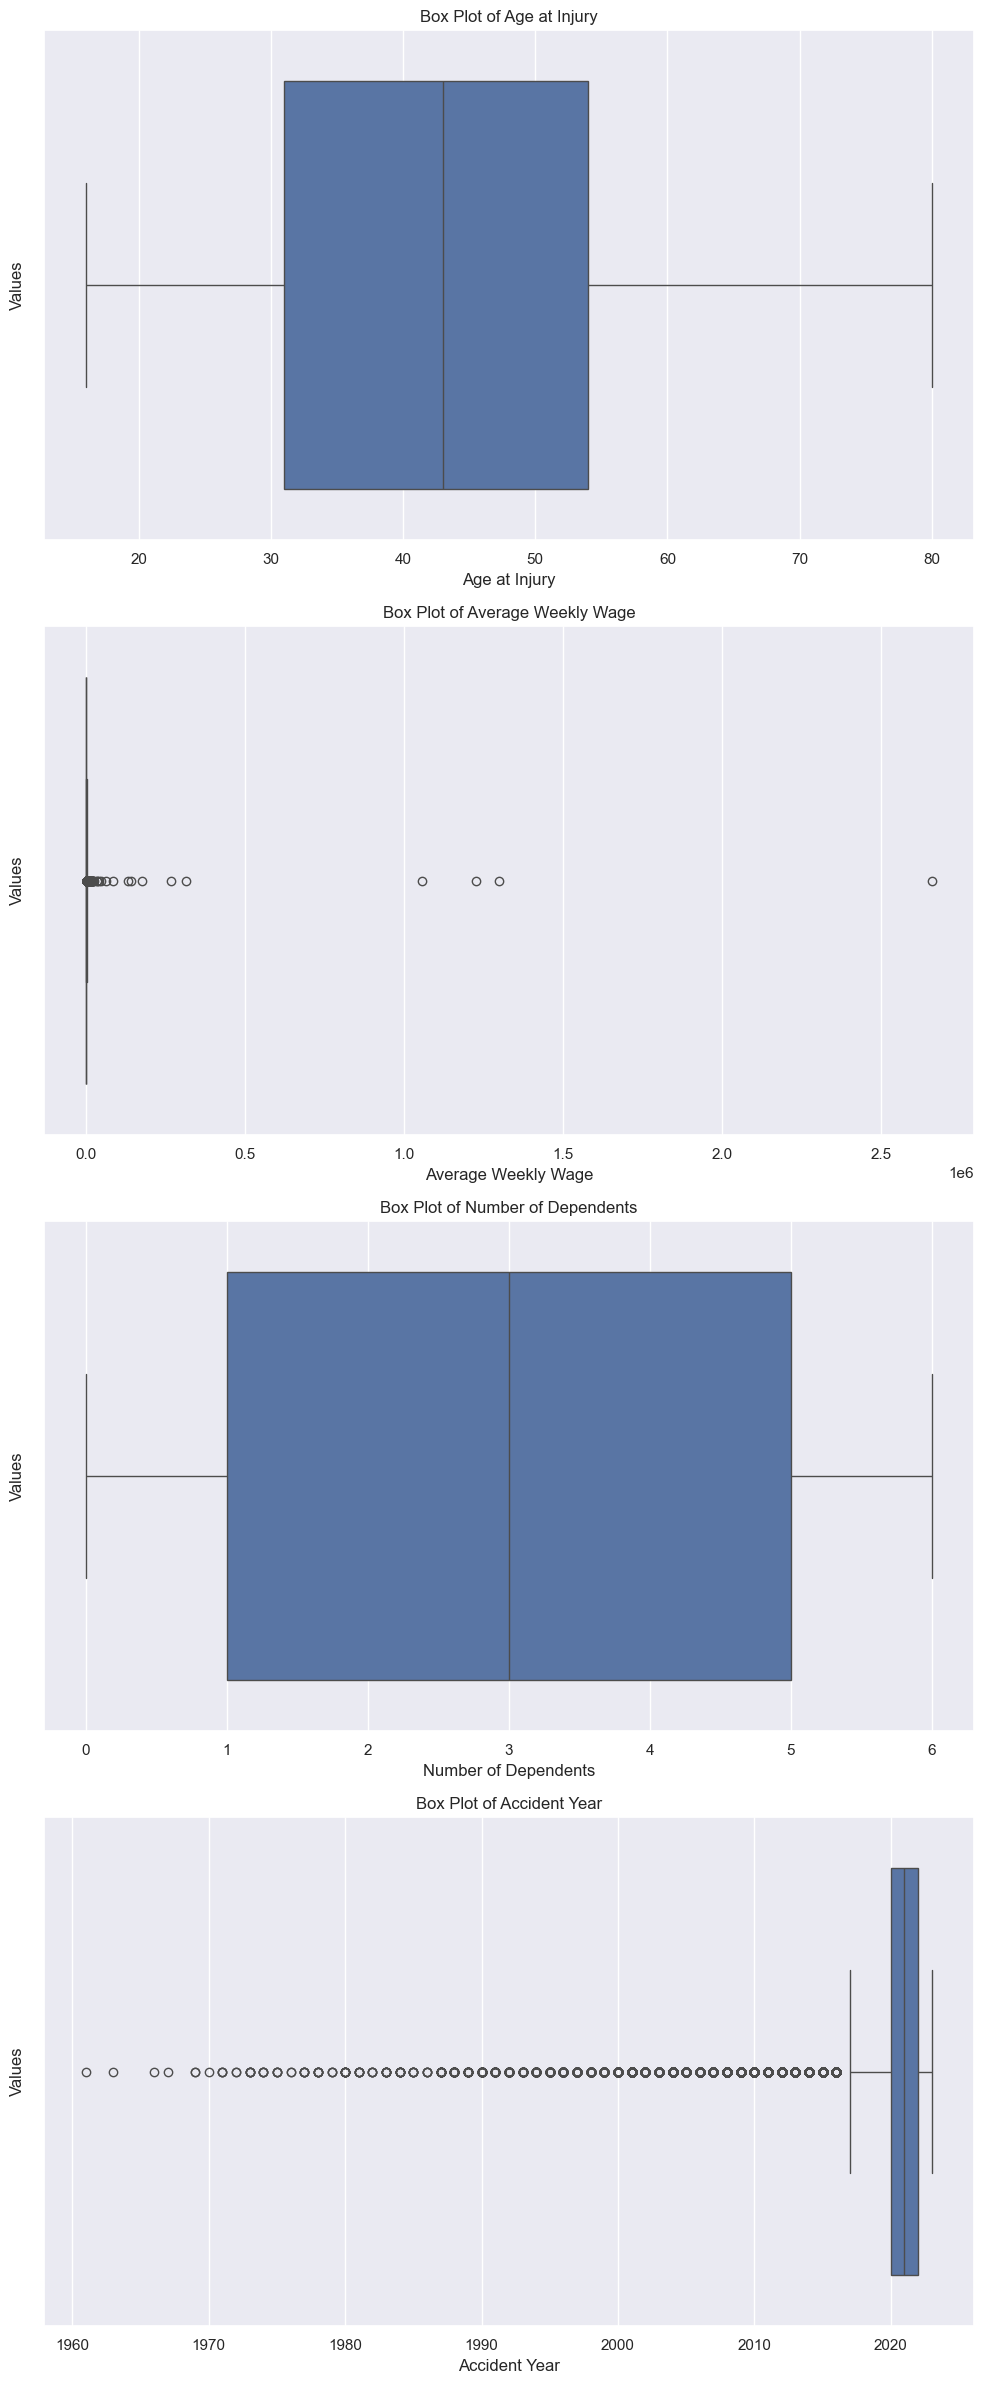

In [214]:
plt.figure(figsize=(10, 6 * len(columns_to_check)))

# Loop through each numeric column and plot a separate box plot
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(len(columns_to_check), 1, i)
    sns.boxplot(x=X_train[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Analysis of Outliers
1. Age at Injury
The box plot for "Age at Injury" shows a fairly symmetrical distribution with no significant outliers.
The data primarily falls between ages 20 and 80, which aligns with typical working age ranges, indicating there are no major age outliers in the data.
2. Average Weekly Wage
The "Average Weekly Wage" plot shows extreme outliers on the high end.
A few values exceed the million mark, which is likely unusual for weekly wages and suggests possible outliers or data entry errors.
This variable will likely need further investigation and treatment for these high outliers.
3. Number of Dependents
The distribution of "Number of Dependents" appears well-contained within 0 to 6 dependents.
No significant outliers are observed, suggesting a reasonable distribution for this variable.
4. Accident Year
The "Accident Year" box plot shows several outliers before the year 2000.
Most of the data is concentrated in recent years (post-2000), which is expected in a modern claims dataset.
Outliers in earlier years could represent older claims or data entry errors and may warrant further review.

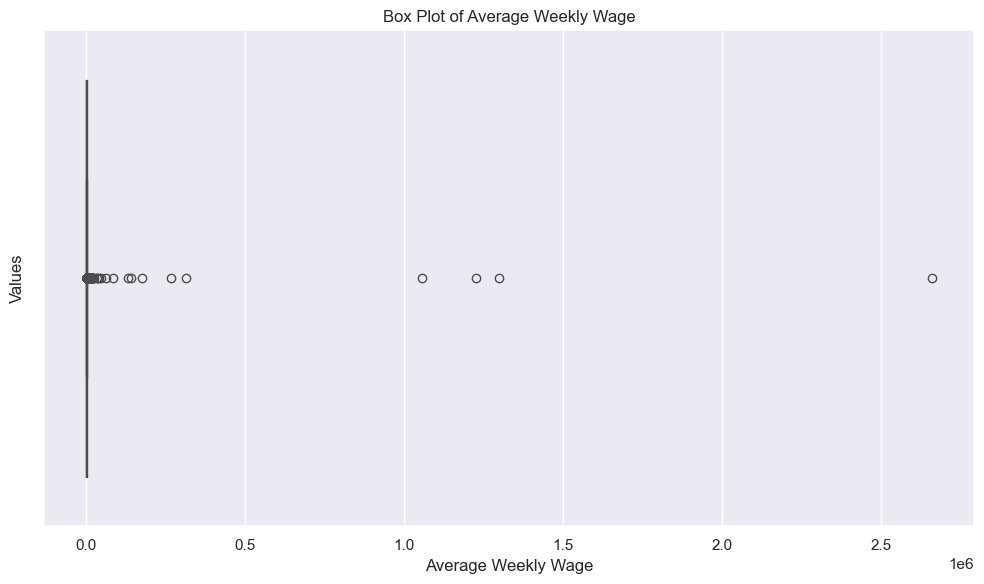

In [215]:
# Filtrar o DataFrame para remover valores zero na coluna 'Average Weekly Wage'
X_train_filtered = X_train[X_train['Average Weekly Wage'] != 0]

# Colunas numéricas selecionadas
columns_to_check_3 = [ 'Average Weekly Wage']

plt.figure(figsize=(10, 6 * len(columns_to_check_3)))

# Loop para criar um boxplot para cada coluna
for i, col in enumerate(columns_to_check_3, 1):
    plt.subplot(len(columns_to_check_3), 1, i)
    sns.boxplot(x=X_train_filtered[col].dropna())  # Remove NaNs e exibe o boxplot
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

#### Analysis of Outliers in `Average Weekly Wage`

The box plot for `Average Weekly Wage` indicates significant outliers. Most values are close to the lower end of the distribution, with only a few observations spread across a wide range up to approximately 2.5.

##### Observations:
- The box plot shows a high concentration of wages near the lower end, with some extreme outliers extending significantly beyond the upper whisker.
- Outliers may represent exceptionally high wages, which could be legitimate high-income cases or data entry anomalies.
- Further analysis is recommended to determine if these high values align with known wage distributions or if they could impact model performance negatively.

In [216]:
X_train_ver=X_train[X_train['Average Weekly Wage']>10000]
X_train_ver.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5776550,2021-06-30,57.0,0.0,2021-07-28,1.0,10054.27,1964.0,2021-07-28,2022-08-01,ARCH INDEMNITY INSURANCE CO.,...,2.0,62.0,IV,74.0,52.0,33.0,11434,0.0,1.0,2021.0
5609235,2020-11-29,NaN,0.0,2020-12-01,0.0,12174.28,NaN,2020-12-01,NaT,INDEMNITY INSURANCE CO OF,...,NaN,49.0,UK,15.0,40.0,35.0,32068,0.0,6.0,2020.0
5773032,2021-07-08,NaN,0.0,2021-07-23,0.0,21260.52,NaN,2021-07-23,NaT,ACE AMERICAN INSURANCE CO,...,NaN,71.0,UK,97.0,52.0,53.0,90805,0.0,2.0,2021.0
5963093,2022-03-23,42.0,0.0,2022-04-08,0.0,48096.72,1980.0,2022-04-08,2022-03-29,TECHNOLOGY INSURANCE CO INC,...,NaN,48.0,III,60.0,49.0,56.0,10927,0.0,0.0,2022.0
5680139,2021-02-23,NaN,0.0,2021-03-15,1.0,35000.00,NaN,2021-03-15,2021-08-23,CONTINENTAL CASUALTY COMPANY,...,6.0,52.0,IV,25.0,52.0,53.0,NaN,0.0,2.0,2021.0


In [217]:
indices_to_remove = X_train_ver.index


# Remover as linhas de X_train com valores em 'Average Weekly Wage' maiores que 10,000
X_train_novo = X_train.drop(X_train_ver.index)

# Verificar a proporção de dados restantes em X_train_novo
print(len(X_train_novo) / len(X_train))

# Remover as mesmas linhas de y_train
# Obter os índices dos valores a serem removidos

# Remover os valores de y_train nos mesmos índices
#y_train_novo = np.delete(y_train, indices_to_remove)

0.9999004524436437


In [218]:
industry_means_train = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()
industry_means_train_1 = X_train_novo.groupby('Industry Code')['Average Weekly Wage'].mean()

In [219]:
industry_means_train

Industry Code
11.0     369.848141
21.0     523.860708
22.0    1064.515784
23.0     662.819370
31.0     410.522212
32.0     395.979419
33.0     446.611684
42.0     481.456002
44.0     231.170917
45.0     255.421542
48.0     657.506097
49.0     601.111367
51.0    1059.636649
52.0     385.025738
53.0     497.860359
54.0     284.668008
55.0     341.319724
56.0     382.408422
61.0     280.780283
62.0     452.486853
71.0     306.120059
72.0     226.985177
81.0     360.919635
92.0     827.223894
Name: Average Weekly Wage, dtype: float64

In [220]:
industry_means_train_1

Industry Code
11.0     369.848141
21.0     523.860708
22.0    1064.515784
23.0     649.859041
31.0     410.522212
32.0     395.979419
33.0     436.382247
42.0     481.456002
44.0     230.574438
45.0     253.644752
48.0     605.599888
49.0     357.712133
51.0     839.853855
52.0     378.613183
53.0     444.564784
54.0     284.668008
55.0     341.319724
56.0     382.408422
61.0     280.780283
62.0     433.808120
71.0     286.082551
72.0     226.985177
81.0     350.298775
92.0     824.150882
Name: Average Weekly Wage, dtype: float64

**Conclusion:** We must remove these outliers before entering salaries based on the industry code

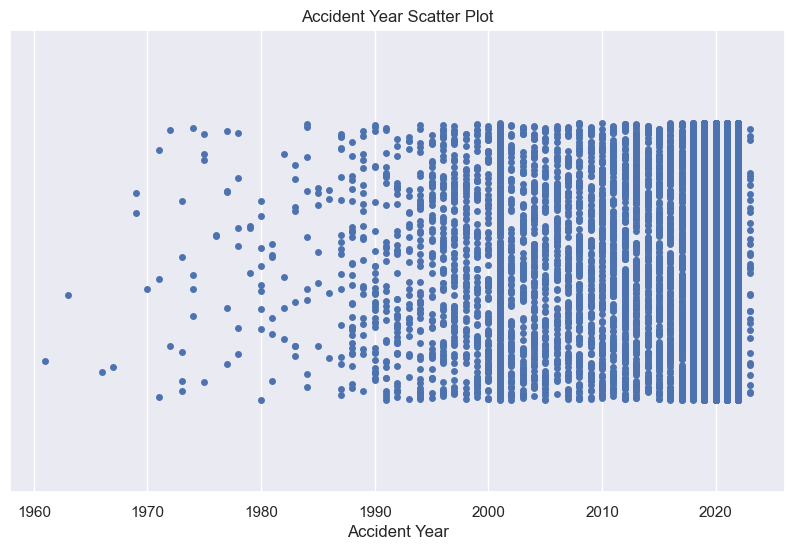

In [221]:
# Scatter plot to check the possible separation of points by year
plt.figure(figsize=(10, 6))
sns.stripplot(data=X_train, x='Accident Year', jitter=0.3)
plt.title('Accident Year Scatter Plot')
plt.xlabel('Accident Year')
plt.show()

#### Analysis of `Accident Year` Distribution

The scatter plot of `Accident Year` shows a dense distribution of incidents over the years, with most events concentrated from the 1980s onward. 

##### Observations:
- **Pre-1980**: There are sparse data points, suggesting fewer recorded incidents or less complete data in earlier years.
- **1980 and later**: There is a dense concentration, which increases as we move towards recent years. This may reflect more comprehensive data collection and record-keeping.
- **Post-2010**: There is a consistently high density, indicating active and robust data recording in recent years.


In [222]:
X_train_ver_1=X_train[X_train['Accident Year']<1970]
X_train_ver_1.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5883889,1967-01-01,NaN,0.0,2021-12-22,0.0,0.0,NaN,2021-12-22,NaT,PUBLIC SERVICE INSURANCE CO,...,NaN,NaN,IV,99.0,59.0,99.0,11214,0.0,2.0,1967.0
5439830,1969-04-01,28.0,0.0,2020-02-28,0.0,0.0,1941.0,NaT,2020-01-30,SPECIAL FUNDS SEC 25-A,...,NaN,NaN,II,NaN,NaN,NaN,12304,0.0,2.0,1969.0
5665076,1966-09-13,23.0,0.0,2021-02-23,0.0,0.0,1943.0,2021-02-23,NaT,MARYLAND CASUALTY COMPANY,...,NaN,33.0,I,56.0,52.0,42.0,12992,0.0,2.0,1966.0


In [223]:
X_train['Assembly Date Year'] = X_train['Assembly Date'].dt.year
X_train['C-2 Date Year'] = X_train['C-2 Date'].dt.year

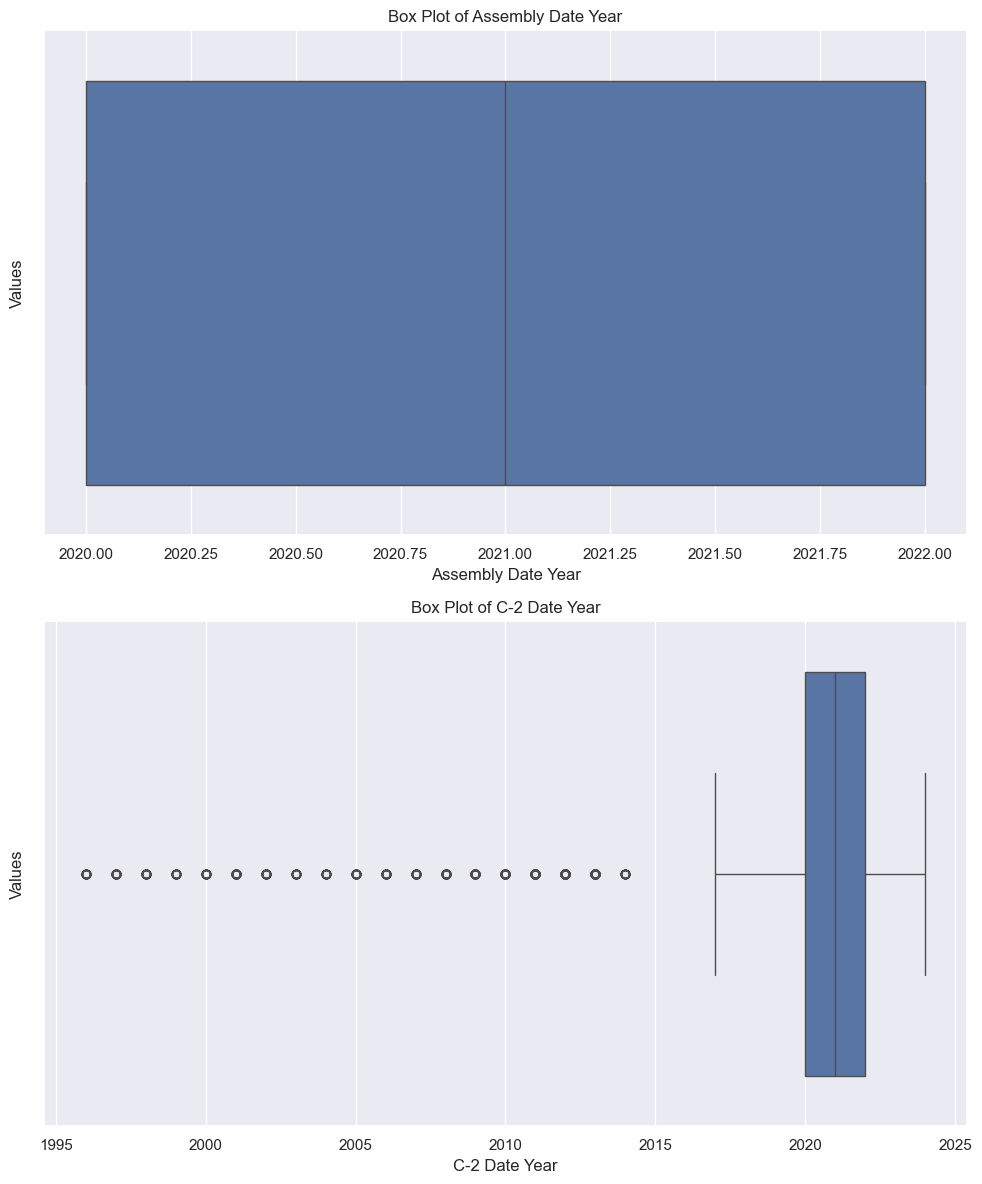

In [224]:
# Define columns to check for date-based outliers
columns_to_check_3 = ['Assembly Date Year', 'C-2 Date Year']

# Plot box plots for each date column
plt.figure(figsize=(10, 6 * len(columns_to_check_3)))
for i, col in enumerate(columns_to_check_3, 1):
    plt.subplot(len(columns_to_check_3), 1, i)
    sns.boxplot(x=X_train[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Analysis of `Assembly Date Year` and `C-2 Date Year` Distributions

##### 1. Assembly Date Year
The box plot for `Assembly Date Year` shows a narrow range of data, with all values clustered between 2020 and 2022. This indicates that the assembly records in this dataset are concentrated in recent years, as it is mentioned in the Project Description.

- **Observation**: The absence of outliers suggests that data is consistently collected within this timeframe.

##### 2. C-2 Date Year
The box plot for `C-2 Date Year` displays a wider range, with data points spanning from 1995 to 2022. There are some older values that appear as individual points, which may indicate isolated entries or events from prior years. Most data points are recent, around the 2015-2022 range, with a few older records extending back to the late 1990s.

- **Observation**: The presence of isolated older values suggests occasional reporting from earlier years.

##### Overall Insights:
The data appears to be recent and concentrated around 2020-2022 for assembly dates, with `C-2 Date Year` showing a slightly broader historical context. This distribution may reflect changes in data availability or policy for data retention.

In [225]:
X_train_ver_2=X_train[X_train['C-2 Date Year']<2015]
X_train_ver_2.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year,Assembly Date Year,C-2 Date Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5471677,2012-04-26,41.0,0.0,2020-04-24,0.0,0.0,1971.0,2012-05-01,NaT,NEW HAMPSHIRE INSURANCE CO,...,IV,68.0,49.0,54.0,10465,0.0,5.0,2012.0,2020.0,2012.0
5475327,2001-05-31,47.0,0.0,2020-05-01,1.0,0.0,1954.0,2001-06-18,NaT,ILLINOIS NATIONAL INS CO,...,IV,33.0,10.0,35.0,11368,1.0,4.0,2001.0,2020.0,2001.0
5674489,2000-09-09,35.0,0.0,2021-03-08,1.0,0.0,1965.0,2000-09-27,NaT,LIBERTY INSURANCE CORP.,...,I,12.0,40.0,35.0,14075,1.0,3.0,2000.0,2021.0,2000.0
5395739,1997-03-18,31.0,0.0,2020-01-06,0.0,0.0,1966.0,1997-04-02,NaT,LIBERTY MUTUAL FIRE INS CO,...,I,27.0,52.0,42.0,13088,1.0,6.0,1997.0,2020.0,1997.0
5923613,2011-01-31,38.0,0.0,2022-02-17,1.0,0.0,1973.0,2011-02-04,NaT,LIBERTY MUTUAL FIRE INS CO,...,IV,32.0,52.0,101.0,11550,1.0,2.0,2011.0,2022.0,2011.0


In [226]:
#Drop Assembly Date Year column from the train
X_train.drop(['Assembly Date Year','C-2 Date Year'], axis=1, inplace=True)

## 5.2. Missing Values <a class="anchor" id="section_5_2"></a>

We may also have missing values that are incorrectly set to zero. Therefore, we will use `.eq(0)` to identify if there are any columns with zeros that are not supposed to have them.


In [227]:
# Count the number of zeros in each column
X_train.eq(0).sum()

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution    399988
Assembly Date                          0
Attorney/Representative           274491
Average Weekly Wage               234796
Birth Year                             0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                382695
District Name                          0
First Hearing Date                     0
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                 382972
Number of Depend

In this section, we identify columns with a high number of zero values, which might indicate potential missing values represented by zero instead of NaN. This helps us to locate inconsistencies or placeholders that we need to address during data preprocessing.

Key observations from the output:

Alternative Dispute Resolution: 399,988 entries are zeros, potentially representing missing values.

Attorney/Representative: 274,491 entries are zeros, likely to be placeholders.

Average Weekly Wage: 234,796 entries have zeros, indicating potential data issues.

COVID-19 Indicator: 382,695 entries are zeros, which may represent cases without a COVID-related claim.

Agreement Reached: 382,972 entries have zeros, which could indicate missing or null agreements.

Number of Dependents: 57,123 entries with zeroes might indicate missing values in this column.

This analysis allows us to consider the necessity of replacing or imputing these zero values during the data preprocessing steps, ensuring they do not interfere with model training and evaluation.

### Handling High Zero Columns

In [228]:
# Set the threshold for zero values (e.g., more than 20% zeros)
threshold = 0.2

# Calculate the percentage of zeros for each column
zero_percentage = X_train.eq(0).mean()

# Filter columns that have more than the threshold of zero values
high_zero_columns = zero_percentage[zero_percentage > threshold]

# Display the columns with their zero percentage
print(high_zero_columns)

Alternative Dispute Resolution    0.995446
Attorney/Representative           0.683123
Average Weekly Wage               0.584334
COVID-19 Indicator                0.952409
Agreement Reached                 0.953098
dtype: float64


We set a threshold to identify columns with a high proportion of zero values (more than 20%). This analysis helps us determine if any columns contain zeros that might represent missing data instead of actual values.

The columns that have more than 20% of zero values are:
- **Alternative Dispute Resolution**: 99.54% zeros
- **Attorney/Representative**: 68.31% zeros
- **Average Weekly Wage**: 58.43% zeros
- **COVID-19 Indicator**: 95.24% zeros
- **Agreement Reached**: 95.31% zeros

We found that **Average Weekly Wage** contains an unexpectedly high number of zeros, which is likely incorrect for this dataset. Since every employee should have a weekly wage, these zeros should be treated as missing values. Therefore, we will replace the zeros in the **Average Weekly Wage** column with `NaN`.


We found that only one column, Average Weekly Wage, contains an unexpectedly high number of zeros. Since this dataset is related to work insurance, every employee must have a weekly wage, meaning these zeros are likely incorrect and should be treated as missing values. Therefore, we will replace the zeros in the Average Weekly Wage column with NaN.

In [229]:
# Replace zeros in 'Average Weekly Wage' with NaN in the train, validation, and test sets
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].replace(0, np.nan)
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].replace(0, np.nan)
df_test['Average Weekly Wage'] = df_test['Average Weekly Wage'].replace(0, np.nan)

### Identifying Remaining Missing Values

After treating zeros as missing values in the **Average Weekly Wage** column, we will now examine the dataset for any remaining `NaN` values. This step ensures that all missing data points are identified, enabling us to address them systematically.

The table below displays the count of missing values (NaN) for each column in the dataset. Some columns, such as **First Hearing Date** and **IME-4 Count**, contain a significant number of missing values, which may require further investigation and treatment.

In [230]:
# Display count of NaN values for each column in the training dataset
X_train.isnull().sum()

Accident Date                       2586
Age at Injury                      40912
Alternative Dispute Resolution         3
Assembly Date                        956
Attorney/Representative                0
Average Weekly Wage               254853
Birth Year                         38549
C-2 Date                           10858
C-3 Date                          270536
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                296305
Gender                                 0
IME-4 Count                       308762
Industry Code                       6937
Medical Fee Region                     0
WCIO Cause of Injury Code          10956
WCIO Nature of Injury Code         10970
WCIO Part Of Body Code             11952
Zip Code                           20242
Agreement Reached                      0
Number of Depend

### Columns with High Percentage of Missing Values

In [231]:
# Set the threshold for missing values (e.g., more than 30% missing)
threshold = 0.2

# Calculate the percentage of missing values for each column
missing_percentage = X_train.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)

Average Weekly Wage    0.634250
C-3 Date               0.673280
First Hearing Date     0.737411
IME-4 Count            0.768413
dtype: float64


Using a threshold of 20%, we identified columns with a high percentage of missing values. Columns such as **First Hearing Date** and **IME-4 Count** have more than 70% missing data, which makes them candidates for potential feature engineering or alternative handling.

In particular:
- **First Hearing Date**: Given its high missing rate, this feature could potentially be transformed into a binary indicator, where 0 indicates missing and 1 indicates available data. This approach allows us to retain any signal that might be present in the presence or absence of this information.

Let's explore more about the rest of missing values.

> #### Handling Missing Values in `IME-4 Count`

The `IME-4 Count` feature represents the number of independent medical audit examinations. A missing value (`NaN`) in this column likely indicates that no audits were conducted for a specific case. Therefore, we have decided to replace all `NaN` values with 0 to indicate that there was no audit.



In [232]:
# Display unique values in 'IME-4 Count' to understand the range
X_train['IME-4 Count'].unique()


array([nan,  4.,  2.,  5.,  3.,  1., 14.,  9.,  6., 10.,  7.,  8., 13.,
       15., 16., 11., 12., 17., 18., 24., 19., 21., 34., 22., 25., 20.,
       23., 29., 33., 26., 27., 73., 36., 28., 47., 39., 37., 32., 31.,
       48., 35., 30.])

As IME-4 represents the number of independent medical audicts examination we decided to convert nan to 0 meaning that there wasn't any.

In [233]:
# Replace NaN values in 'IME-4 Count' with 0 in the training, validation, and test sets
X_train['IME-4 Count'].fillna(0, inplace=True)
X_val['IME-4 Count'].fillna(0, inplace=True)
df_test['IME-4 Count'].fillna(0, inplace=True)

# Confirm replacement by displaying unique values again
X_train['IME-4 Count'].unique()


array([ 0.,  4.,  2.,  5.,  3.,  1., 14.,  9.,  6., 10.,  7.,  8., 13.,
       15., 16., 11., 12., 17., 18., 24., 19., 21., 34., 22., 25., 20.,
       23., 29., 33., 26., 27., 73., 36., 28., 47., 39., 37., 32., 31.,
       48., 35., 30.])

> #### Handling Missing Values in `C-3 Date`

The `C-3 Date` feature was dropped because it exceeded the threshold for missing values that we predefined. This indicates that the feature likely lacks sufficient predictive power due to the high amount of missing information.

We decided to drop C-3 Date based on the threshold that we pre defined meaning those features don't have enough predictive power based on the amount of missing information.


In [234]:
# Drop 'C-3 Date' column from training, validation, and test sets
X_train = X_train.drop('C-3 Date', axis=1)

# Apply to the validation set
X_val = X_val.drop('C-3 Date', axis=1)

# Apply to the test set
df_test = df_test.drop('C-3 Date', axis=1)

> #### Imputing Missing Values in `Average Weekly Wage`

For now, we will impute the missing values in the `Average Weekly Wage` feature based on the mean values grouped by `Industry Code`. This allows us to approximate the missing values by considering the industry context of each entry.

In [235]:
# Calculate the mean of 'Average Weekly Wage' for each 'Industry Code' in the training dataset
industry_means_train = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Define a function to fill missing values based on 'Industry Code' using training means
def impute_average_weekly_wage(row):
    if pd.isnull(row['Average Weekly Wage']):
        return industry_means_train.get(row['Industry Code'], row['Average Weekly Wage'])
    return row['Average Weekly Wage']

# Apply the function to fill missing values in 'Average Weekly Wage' for X_train, X_val, and X_test
X_train['Average Weekly Wage'] = X_train.apply(impute_average_weekly_wage, axis=1)
X_val['Average Weekly Wage'] = X_val.apply(impute_average_weekly_wage, axis=1)
df_test['Average Weekly Wage'] = df_test.apply(impute_average_weekly_wage, axis=1)


> #### Imputing Missing Values in `Zip Code`

To impute missing values in the `Zip Code` feature, we use the mode of `Zip Code` based on the combination of `County of Injury` and `District Name`. This approach ensures that missing values are filled with the most frequent `Zip Code` for each unique combination of county and district, providing a region-specific approximation.


In [236]:
# Calculate the mode of 'Zip Code' for each ('County of Injury', 'District Name') pair in the training dataset
zip_code_mode_train = X_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Zip Code' based on 'County of Injury' and 'District Name' using training mode
def impute_zip_code(row):
    if pd.isna(row['Zip Code']):
        # Get the mode of the zip code for the given county and district from training set
        return zip_code_mode_train.get((row['County of Injury'], row['District Name']), row['Zip Code'])
    return row['Zip Code']

# Apply the imputation function to 'Zip Code' for X_train, X_val, and X_test
X_train['Zip Code'] = X_train.apply(impute_zip_code, axis=1)
X_val['Zip Code'] = X_val.apply(impute_zip_code, axis=1)
df_test['Zip Code'] = df_test.apply(impute_zip_code, axis=1)

> #### Imputing Missing Values in `Industry Code`

To impute missing values in the `Industry Code` feature, we calculate the mode of `Industry Code` based on the combination of `Carrier Name` and `Carrier Type`. This approach allows us to assign the most common `Industry Code` for each carrier and carrier type combination, providing a relevant approximation for missing values.

In [237]:
# Calculate the mode of 'Industry Code' for each ('Carrier Name', 'Carrier Type') pair in the training dataset
industry_code_mode_train = X_train.groupby(['Carrier Name', 'Carrier Type'])['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Industry Code' based on 'Carrier Name' and 'Carrier Type' using training mode
def impute_industry_code(row):
    if pd.isna(row['Industry Code']):
        # Get the mode of the industry code for the given carrier name and carrier type from training set
        return industry_code_mode_train.get((row['Carrier Name'], row['Carrier Type']), row['Industry Code'])
    return row['Industry Code']

# Apply the imputation function to 'Industry Code' for X_train, X_val, and df_test
X_train['Industry Code'] = X_train.apply(impute_industry_code, axis=1)
X_val['Industry Code'] = X_val.apply(impute_industry_code, axis=1)
df_test['Industry Code'] = df_test.apply(impute_industry_code, axis=1)

#### Imputing `Birth Year`

To impute missing values in the `Birth Year` feature, we use the `Assembly Date` and `Age at Injury`. If both `Assembly Date` and `Age at Injury` are available, we can calculate the `Birth Year` by subtracting `Age at Injury` from the year of `Assembly Date`.

In [238]:
# Ensure 'Assembly Date' is in datetime format for all datasets
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')
df_test['Assembly Date'] = pd.to_datetime(df_test['Assembly Date'], errors='coerce')

# Define a function to impute 'Birth Year' based on 'Assembly Date' and 'Age at Injury'
def impute_birth_year(row):
    if pd.isna(row['Birth Year']):
        if pd.notna(row['Assembly Date']) and pd.notna(row['Age at Injury']):
            # Calculate birth year by subtracting age at injury from assembly year
            assembly_year = row['Assembly Date'].year
            return float(assembly_year - row['Age at Injury'])
    return row['Birth Year']

# Apply the imputation function to 'Birth Year' for X_train, X_val, and df_test
X_train['Birth Year'] = X_train.apply(impute_birth_year, axis=1)
X_val['Birth Year'] = X_val.apply(impute_birth_year, axis=1)
df_test['Birth Year'] = df_test.apply(impute_birth_year, axis=1)

> Age at Injury

The column `Age at Injury` contains missing values which represent key data about the age of the person at the time of the injury. We observe that by retaining this feature and carefully imputing its missing values, we ensure that we preserve potentially valuable information for the predictive model.


In [239]:
# Drop 'Birth Year' from X_train, X_val, and df_test
X_train = X_train.drop(columns=['Birth Year'])
X_val = X_val.drop(columns=['Birth Year'])
df_test = df_test.drop(columns=['Birth Year'])

After addressing `Birth Year`, we check the percentage of missing values in `df_test`. This will guide us on further preprocessing steps to handle any remaining missing data.


In [240]:
# Calculate the percentage of missing values in df_test
missing_percentage = df_test.isnull().mean() * 100
missing_percentage

Accident Date                      0.629937
Age at Injury                     10.942973
Alternative Dispute Resolution     0.000258
Assembly Date                      0.057220
Attorney/Representative            0.000000
Average Weekly Wage                1.973839
C-2 Date                           2.400928
Carrier Name                       0.000000
Carrier Type                       0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                88.911914
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.005155
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.667182
WCIO Nature of Injury Code         2.721825
WCIO Part Of Body Code             2.461241
Zip Code                           0.000773
Number of Dependents               0.000000
Accident Year                   

**1. Exclude `First Hearing Date`**:  
We check the percentage of rows with missing values after excluding `First Hearing Date`, which has a high percentage of missing entries.


In [241]:
# Check percentage of rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date'])].isna().any(axis=1)
percentage_missing = (missing_values.sum() / len(X_train)) * 100
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")

Percentage of rows with missing values (excluding 'First Hearing Date'): 12.84%


**2. Exclude `Age at Injury`**:  
Additionally, we explore the impact of excluding both `First Hearing Date` and `Age at Injury` to see how much of the data remains usable.

In [242]:
# Check percentage of rows with missing values, excluding both 'First Hearing Date' and 'Age at Injury'
missing_values = X_train[X_train.columns.difference(['First Hearing Date', 'Age at Injury'])].isna().any(axis=1)
percentage_missing = (missing_values.sum() / len(X_train)) * 100
print(f"Percentage of rows with missing values (excluding 'First Hearing Date' and 'Age at Injury'): {percentage_missing:.2f}%")

Percentage of rows with missing values (excluding 'First Hearing Date' and 'Age at Injury'): 3.89%


## we can consider this: We decrease a lot the percentage of rows with missing values, so, for this motive we will delete the variable Age at Injury.

In [243]:
# #Drop Age at Injury from the train, val and test set
# X_train = X_train.drop(columns=['Age at Injury'])
# X_val = X_val.drop(columns=['Age at Injury'])
# df_test = df_test.drop(columns=['Age at Injury']) 3.72??

Since only 3.89% of the values are missing, we decided to use KNNImputer to fill in these missing values. It’s important to note that we are not including 'First Hearing Date' in this imputation, as missing values in this column have a specific meaning. We plan to create a new feature based on the presence or absence of 'First Hearing Date' as part of the feature engineering process, after which the original column will be dropped.

In [244]:
# Create copies of the datasets to avoid modifying the original
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
df_test_copy = df_test.copy()

# Drop the column 'Agreement Reached' if it's not in the test set
columns_to_drop = ['Agreement Reached']
X_train_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)
X_val_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)
df_test_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Define lists for categorical/code features and numeric features
categorical_features = ['Zip Code', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Alternative Dispute Resolution']
numeric_features = ['Accident Year', 'C-2 Date', 'Age at Injury', 'Average Weekly Wage', 'Accident Date', 'Assembly Date']

# Mode imputation for categorical/code features (using mode of X_train)
for col in categorical_features:
    if col in X_train_copy.columns:
        mode_value = X_train_copy[col].mode()[0]  # Calculate mode from the training set

        # Apply mode imputation to X_train, X_val, and df_test
        X_train_copy[col].fillna(mode_value, inplace=True)
        X_val_copy[col].fillna(mode_value, inplace=True)
        if col in df_test_copy.columns:
            df_test_copy[col].fillna(mode_value, inplace=True)

# Mean imputation for numeric features (using mean of X_train)
for col in numeric_features:
    if col in X_train_copy.columns:
        mean_value = X_train_copy[col].mean()  # Calculate mean from the training set

        # Apply mean imputation to X_train, X_val, and df_test
        X_train_copy[col].fillna(mean_value, inplace=True)
        X_val_copy[col].fillna(mean_value, inplace=True)
        if col in df_test_copy.columns:
            df_test_copy[col].fillna(mean_value, inplace=True)

# Convert numeric features back to integer where needed
for col in int_columns:
    # Round the column values to ensure they are integer-compatible
    X_train_copy[col] = X_train_copy[col].round().astype('Int64')  # Convert to nullable integer type
    X_val_copy[col] = X_val_copy[col].round().astype('Int64')
    df_test_copy[col] = df_test_copy[col].round().astype('Int64')

# Convert date features back to datetime
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date']
for col in date_columns:
    X_train_copy[col] = pd.to_datetime(X_train_copy[col], errors='coerce')
    X_val_copy[col] = pd.to_datetime(X_val_copy[col], errors='coerce')
    df_test_copy[col] = pd.to_datetime(df_test_copy[col], errors='coerce')

# Final dataframes after mode and mean imputation with type corrections
X_train_processed = X_train_copy
X_val_processed = X_val_copy
df_test_processed = df_test_copy

# Print confirmation
print("Missing values imputed using mode for categorical features and mean for numeric features. Types corrected for integer and date columns.")


NameError: name 'int_columns' is not defined

In [245]:
X_train_processed.isnull().mean() * 100

NameError: name 'X_train_processed' is not defined

In [246]:
X_val_processed.isnull().mean() * 100

NameError: name 'X_val_processed' is not defined

In [247]:
df_test_processed.isnull().mean() * 100

NameError: name 'df_test_processed' is not defined

## 5.3. Categorical Features <a class="anchor" id="section_5_3"></a>
What should we do? encoding?

this prob makes more sense after the feature enginerring because we can create some features bases on these one

In [795]:
features_categorical = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'COVID-19 Indicator',
    'County of Injury',
    'Carrier Type',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [796]:
features_categorical

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region']

In [797]:
features_categorical= ['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Medical Fee Region']

Alternative Dispute Resolution
float64


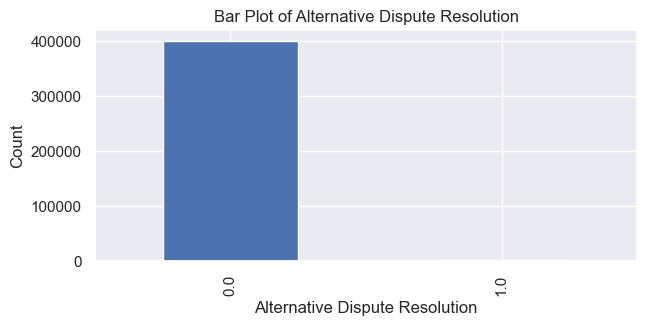

Attorney/Representative
float64


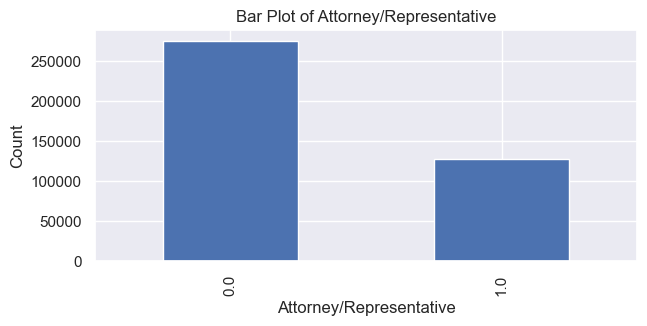

COVID-19 Indicator
float64


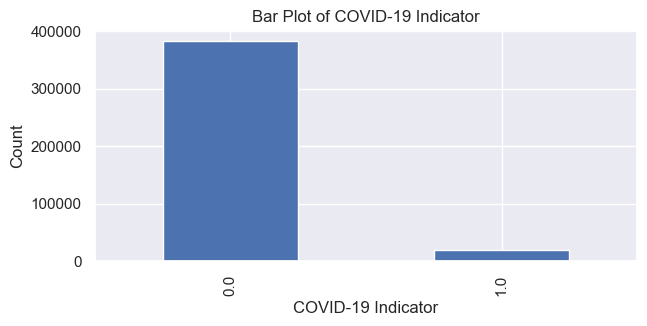

County of Injury
object


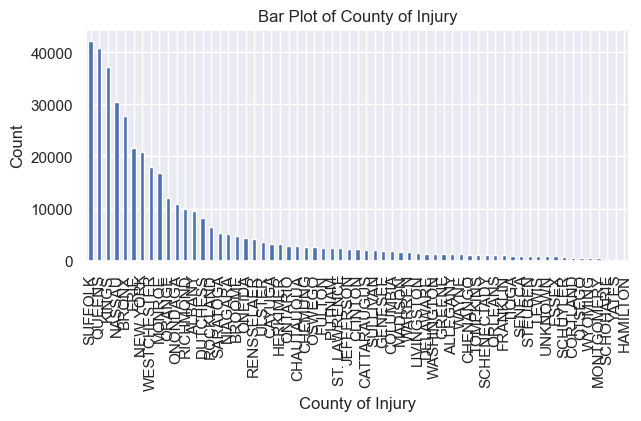

Carrier Type
object


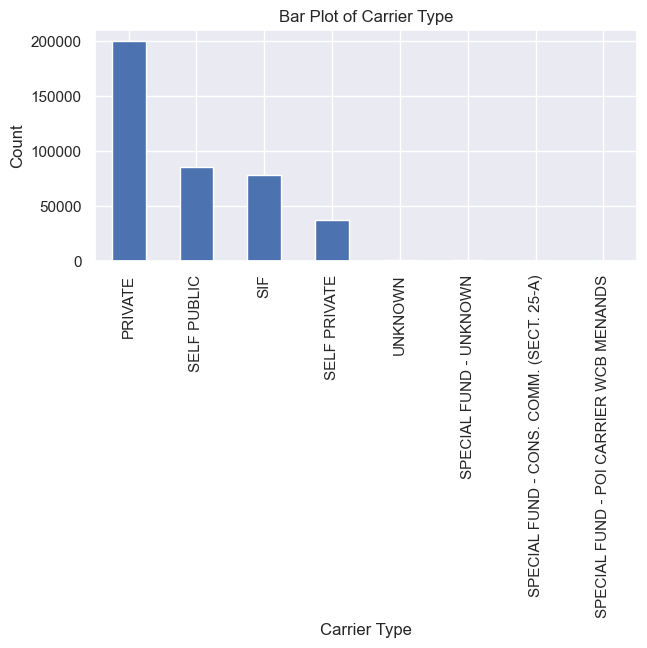

District Name
object


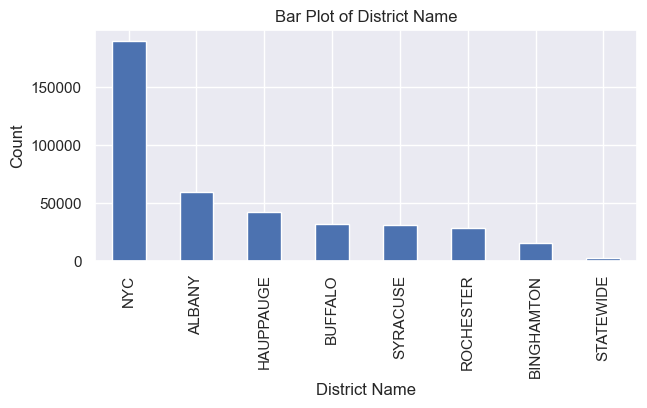

Gender
object


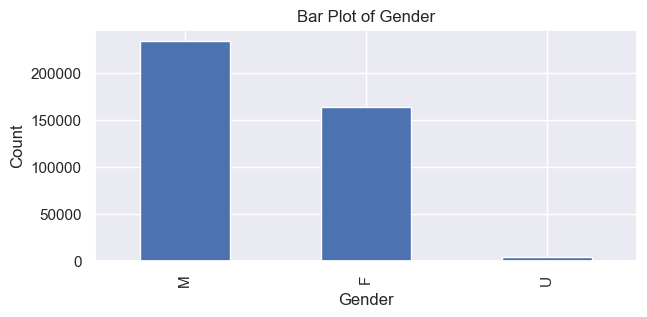

Medical Fee Region
object


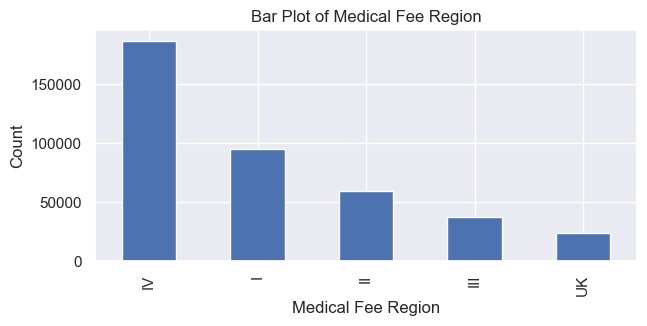

In [798]:
for feature in features_categorical:
    print(feature)
    print(X_train_processed[feature].dtype)
    X_train_processed[feature].value_counts().plot(kind='bar', figsize=(7, 3))
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# 6. Feature Engineering <a class="anchor" id="chapter6"></a>

Feature engineering is the process of preparing data for machine learning models by transforming raw data into meaningful features that enhance model performance. In this section, we create, select and modify variables to capture significant patterns within the data, making it more informative and useful for the model’s learning process. Through these transformations, we aim to improve the model’s accuracy and effectiveness.

## 6.1. Carrier-District Interaction <a class="anchor" id="section_6_1"></a>
Combining Carrier Type with District Name may reveal regional preferences for certain insurance carriers, which could be useful in understanding regional biases or regulations.

In [799]:
# Creating a new feature by combining Carrier Type and District Name
X_train_processed['Carrier_District_Interaction'] = X_train_processed['Carrier Type'] + "_" + X_train_processed['District Name']

#Apply to the val set
X_val_processed['Carrier_District_Interaction'] = X_val_processed['Carrier Type'] + "_" + X_val_processed['District Name']

# Apply to the test set
df_test_processed['Carrier_District_Interaction'] = df_test_processed['Carrier Type'] + "_" + df_test_processed['District Name']

## 6.2. Income Category  <a class="anchor" id="section_6_2"></a>

Creating categories for Average Weekly Wage can simplify the continuous nature of income into meaningful segments such as Low, Average, and High, which could help the model understand different socioeconomic statuses.

In [800]:
# Calculate key percentiles
percentiles = X_train_processed['Average Weekly Wage'].quantile([0.25, 0.5, 0.75, 0.9])
print(percentiles)

0.25     875.292500
0.50    1202.603263
0.75    1312.995000
0.90    1669.812496
Name: Average Weekly Wage, dtype: float64


In [801]:
# Defining the bins and labels for categorizing income based on percentiles
income_bins = [0, 875.292500, 1202.603263, 1312.995000, float('inf')]  #float('inf') represent positive infinity, , allowing us to set open-ended ranges.
income_labels = ['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income']

# Creating the new feature for income categories for train set
X_train_processed['Income_Category'] = pd.cut(X_train_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the val set
X_val_processed['Income_Category'] = pd.cut(X_val_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the test set
df_test_processed['Income_Category'] = pd.cut(df_test_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

In [802]:
# Since we have created the new feature, we can drop the 'Average Weekly Wage' column
X_train_processed = X_train_processed.drop(columns=['Average Weekly Wage'])

#Apply to the val set   
X_val_processed = X_val_processed.drop(columns=['Average Weekly Wage']) 

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Average Weekly Wage'])

## 6.3. Has First Hearing Date  <a class="anchor" id="section_6_3"></a>

Since First Hearing Date has a significant amount of missing values, transforming it into a binary feature (1 if it exists, 0 if it doesn't) will allow the model to consider the presence or absence of this date as a factor.


In [803]:
# Creating a binary feature indicating the presence of First Hearing Date
X_train_processed['Has_1st_Hearing_Date'] = X_train_processed['First Hearing Date'].notna().astype(int)

# Apply to the val set
X_val_processed['Has_1st_Hearing_Date'] = X_val_processed['First Hearing Date'].notna().astype(int)

# Apply to the test set
df_test_processed['Has_1st_Hearing_Date'] = df_test_processed['First Hearing Date'].notna().astype(int)

In [804]:
#Drop First Hearing Date from the train, val and test set
X_train_processed = X_train_processed.drop(columns=['First Hearing Date'])
X_val_processed = X_val_processed.drop(columns=['First Hearing Date'])
df_test_processed = df_test_processed.drop(columns=['First Hearing Date'])

## 6.4. Accident Quarter  <a class="anchor" id="section_6_4"></a>
Temporal data can often influence outcomes. Extracting the quarter of the accident (e.g., 1st, 2nd, etc.)

In [805]:
# Extracting the quarter of the Accident Date
X_train_processed['Accident_Quarter'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the val set
X_val_processed['Accident_Quarter'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the test set
df_test_processed['Accident_Quarter'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.quarter

## 6.5. Accident Year <a class="anchor" id="section_6_5"></a>
The year can help the model understand seasonal or yearly effects, like accident patterns during different times of the year.

In [806]:
# Extracting the year from the Accident Date
X_train_processed['Accident_Year'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.year

#Apply to the val set
X_val_processed['Accident_Year'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.year

# Apply to the test set
df_test_processed['Accident_Year'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.year

## 6.6. Accident on Day and Weekend <a class="anchor" id="section_6_6"></a>

The day of the accident could be significant. Weekends might have different risk factors compared to weekdays.

In [807]:
# Extracting the day of the week and creating a feature to indicate if the accident occurred on a weekend
X_train_processed['Accident Day'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.dayofweek
X_train_processed['Accident on Weekend'] = X_train_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

#Apply to the val set
X_val_processed['Accident Day'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.dayofweek
X_val_processed['Accident on Weekend'] = X_val_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

# Apply to the test set
df_test_processed['Accident Day'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.dayofweek    
df_test_processed['Accident on Weekend'] = df_test_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

## 6.8. Age Group <a class="anchor" id="section_6_8"></a>

Grouping ages can help simplify the model’s understanding of different age demographics (e.g., Youth, Adult, Senior). This could potentially improve model interpretability and performance.

In [808]:
np.sort(X_train_processed['Age at Injury'].unique())

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
      dtype=object)

In [809]:
# Creating bins and labels for age groups
age_bins = [0, 25, 45, 65, float('inf')]
age_labels = ['Youth', 'Young Adult', 'Middle Age', 'Senior']

# Creating a new feature for age groups
X_train_processed['Age Group'] = pd.cut(X_train_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the val set
X_val_processed['Age Group'] = pd.cut(X_val_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the test set
df_test_processed['Age Group'] = pd.cut(df_test_processed['Age at Injury'], bins=age_bins, labels=age_labels)

In [810]:
# Drop 'Age at Injury' from the train, val and test set
X_train_processed = X_train_processed.drop(columns=['Age at Injury'])
X_val_processed = X_val_processed.drop(columns=['Age at Injury'])
df_test_processed = df_test_processed.drop(columns=['Age at Injury'])

## 6.8. Promptness_category <a class="anchor" id="section_6_8"></a>

The "promptness_category" feature categorizes the time taken between key events in the claims process, specifically measuring the difference between the Accident Date and the Assembly Date. This feature quantifies the speed or delay in assembling the claim and provides insight into how promptly claims are processed.

In [811]:
def categorize_promptness(df, date1_col, date2_col, new_col_name):
    """
    Calculate and categorize promptness between two date columns.

    Parameters:
    - df: The DataFrame to process.
    - date1_col: The column representing the first date (e.g., Assembly Date).
    - date2_col: The column representing the second date (e.g., Accident Date).
    - new_col_name: The name of the new categorical column for promptness.

    Returns:
    - Updated DataFrame with new categorized promptness column.
    """
    # Calculate promptness in days and categorize it
    df[new_col_name] = pd.cut(
        (df[date1_col] - df[date2_col]).dt.days,
        bins=[0, 7, 14, 30, 90, 180, 365, float('inf')],
        labels=['Until 1 weeks','Between 1 and 2 weeks', 'Between 2 weeks and 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
        right=True
    )
    return df

# Apply the function to X_train_processed
X_train_processed = categorize_promptness(X_train_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

# Apply the function to X_val_processed
X_val_processed = categorize_promptness(X_val_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

# Apply the function to df_test_processed
df_test_processed = categorize_promptness(df_test_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

In [812]:
X_train_processed['promptness_category'].value_counts()

Until 1 weeks                  159734
Between 1 and 2 weeks           85291
Between 2 weeks and 1 month     67198
1 to 3 months                   50107
3 to 6 months                   15656
More than 1 year                10028
6 months to 1 year               9600
Name: promptness_category, dtype: int64

## 6.9. promptness_C2_category <a class="anchor" id="section_6_9"></a>
The "promptness_C2_category" feature tracks the time taken to register the C-2 Date (the receipt of the employer's report of work-related injury/illness) after the Accident Date. It evaluates employers' promptness in reporting accidents, offering insights into compliance and potential administrative delays.

# this is ggiving negative values and id understand whhy

In [813]:
# # Calculate the time from Accident Date to C-2 Date (in days)
# X_train_processed['Time_Accident_to_C2'] = (X_train_processed['C-2 Date'] - X_train_processed['Accident Date']).dt.days

# #Apply to the val set
# X_val_processed['Time_Accident_to_C2'] = (X_val_processed['C-2 Date'] - X_val_processed['Accident Date']).dt.days

# # Apply to the test set
# df_test_processed['Time_Accident_to_C2'] = (df_test_processed['C-2 Date'] - df_test_processed['Accident Date']).dt.days

In [814]:
# Count the number of rows where C-2 Date is earlier than Accident Date
num_negative_values = (X_train_processed['C-2 Date'] < X_train_processed['Accident Date']).sum()

# Print the number of rows with negative values
print(f"Number of rows where C-2 Date is earlier than Accident Date: {num_negative_values}")

Number of rows where C-2 Date is earlier than Accident Date: 4270


In [815]:
# Calculate promptness in days for C-2 Date
X_train_processed['Time_Accident_to_C2'] = (X_train_processed['C-2 Date'] - X_train_processed['Accident Date']).dt.days

# Replace negative values with Nan
np.sort(X_train_processed['Time_Accident_to_C2'].unique())

array([-7750, -6392, -4938, ..., 20079, 21439, 21503], dtype=int64)

In [816]:
X_train_processed.drop(columns=['Time_Accident_to_C2'], inplace=True)

In [817]:
# # Calculate and categorize promptness for C-2 Date for X_train_processed
# X_train_processed['promptness_C2_category'] = pd.cut(
#     (X_train_processed['C-2 Date'] - X_train_processed['Accident Date']).dt.days,
#     bins=[0, 30, 90, 180, 365, float('inf')],
#     labels=['Until 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
#     right=True
# )

# # Apply the same logic to X_val_processed
# X_val_processed['promptness_C2_category'] = pd.cut(
#     (X_val_processed['C-2 Date'] - X_val_processed['Accident Date']).dt.days,
#     bins=[0, 30, 90, 180, 365, float('inf')],
#     labels=['Until 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
#     right=True
# )

# # Apply the same logic to df_test
# df_test_processed['promptness_C2_category'] = pd.cut(
#     (df_test_processed['C-2 Date'] - df_test_processed['Accident Date']).dt.days,
#     bins=[0, 30, 90, 180, 365, float('inf')],
#     labels=['Until 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
#     right=True
# )


After creating new features based on the existing date columns, we will remove the original date features to avoid redundancy and simplify the dataset. We believe that the impact of these date features is adequately captured in the newly engineered features.

In [818]:
X_train_processed = X_train_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Accident Date','Assembly Date', 'C-2 Date'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

## 6.10. ZIP Code Region <a class="anchor" id="section_6_10"></a>

The first two digits of the ZIP Code typically represent a broader region, which could provide some geographic insights without the granularity of the full ZIP Code. This simplification can make the model more interpretable and help reduce the feature dimensionality.

In [819]:
# Extracting the first two digits of the ZIP Code to create a region-based feature
X_train_processed['Zip Code Region'] = X_train_processed['Zip Code'].astype(str).str[:2]

# Apply to the val set
X_val_processed['Zip Code Region'] = X_val_processed['Zip Code'].astype(str).str[:2]

# Apply to the test set
df_test_processed['Zip Code Region'] = df_test_processed['Zip Code'].astype(str).str[:2]

In [820]:
X_train_processed['Zip Code'].nunique()

6972

In [821]:
X_train_processed['Zip Code Region'].nunique()

100

For this motive we will delete also the Zip Code, for now.

In [822]:
X_train_processed = X_train_processed.drop(columns=['Zip Code'])
#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Zip Code'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Zip Code'])

## 6.11. Carrier Type Merged <a class="anchor" id="section_6_11"></a>

Since there are several categories under "Special Fund" with very few occurrences, combining them into a single category can reduce noise in the data and make the feature more manageable for the model.

In [823]:
# Creating a new feature that merges all 'Special Fund' categories into a single category for train, validation, and test sets
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier Type Merged'] = dataset['Carrier Type'].replace({
        'SPECIAL FUND - UNKNOWN': 'SPECIAL FUND',
        'SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
        'SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'SPECIAL FUND'
    })

# Verifying the updated column for X_train_processed
print(X_train_processed['Carrier Type Merged'].value_counts())

PRIVATE         199662
SELF PUBLIC      85284
SIF              77886
SELF PRIVATE     37004
UNKNOWN           1262
SPECIAL FUND       720
Name: Carrier Type Merged, dtype: int64


## 6.12. Carrier_Name_Simplified <a class="anchor" id="section_6_12"></a>

The 'Carrier Name' feature has a high cardinality, which means there are many unique values—1951 in total. Having too many unique categories can cause problems in machine learning models, especially if some categories have very few instances. To simplify the analysis and improve the model performance, we will group carrier names with fewer than 3000 occurrences under a single category called 'OTHER'.


In [824]:
# Print the most frequent Carrier Names along with their counts
most_frequent_carriers = X_train_processed['Carrier Name'].value_counts().head(25)  # Adjust the number if you need more
print("Most frequent Carrier Names with their counts:")
print(most_frequent_carriers)

Most frequent Carrier Names with their counts:
STATE INSURANCE FUND             77886
POLICE, FIRE, SANITATION         15145
AMERICAN ZURICH INSURANCE CO     12274
CHARTER OAK FIRE INS CO          12106
INDEMNITY INS. OF N AMERICA      10123
SAFETY NATIONAL CASUALTY CORP     9684
NEW HAMPSHIRE INSURANCE CO        8823
LM INSURANCE CORP                 8521
A I U INSURANCE COMPANY           7739
INDEMNITY INSURANCE CO OF         6338
NYC TRANSIT AUTHORITY             5781
HARTFORD ACCIDENT & INDEMNITY     5199
NEW YORK BLACK CAR OPERATORS'     5106
ARCH INDEMNITY INSURANCE CO.      4610
AIU INSURANCE CO                  4601
CNY OTHER THAN ED, HED WATER      4530
HEALTH & HOSPITAL CORP.           3879
ARCH INDEMNITY INSURANCE CO       3816
PENNSYLVANIA MANUFACTURERS'       3408
PUBLIC EMPLOYERS RISK MGMT.       3198
ACE AMERICAN INSURANCE CO.        3188
OLD REPUBLIC INSURANCE CO.        3042
MEMIC INDEMNITY COMPANY           2893
WAL-MART ASSOCIATES, INC.         2733
NY MUNICIPAL WC A

In [825]:
# Create a new feature called 'Carrier_Name_Simplified' based on 'Carrier Name' for train, validation, and test sets
X_train_processed['Carrier_Name_Simplified'] = X_train_processed['Carrier Name']
X_val_processed['Carrier_Name_Simplified'] = X_val_processed['Carrier Name']
df_test_processed['Carrier_Name_Simplified'] = df_test_processed['Carrier Name']

# Identify carrier names that occur fewer than 2000 times in X_train_processed
carrier_counts = X_train_processed['Carrier Name'].value_counts()
carriers_to_replace = carrier_counts[carrier_counts < 2000].index

# Replace carrier names with fewer than 2000 occurrences with 'OTHER' in all datasets using the identified carriers from X_train
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier_Name_Simplified'] = dataset['Carrier_Name_Simplified'].replace(carriers_to_replace, 'OTHER')

# Print the counts of the simplified carrier names in X_train_processed to verify the result
print("Counts of 'Carrier_Name_Simplified' feature in X_train_processed:")
print(X_train_processed['Carrier_Name_Simplified'].value_counts())


Counts of 'Carrier_Name_Simplified' feature in X_train_processed:
OTHER                             156237
STATE INSURANCE FUND               77886
POLICE, FIRE, SANITATION           15145
AMERICAN ZURICH INSURANCE CO       12274
CHARTER OAK FIRE INS CO            12106
INDEMNITY INS. OF N AMERICA        10123
SAFETY NATIONAL CASUALTY CORP       9684
NEW HAMPSHIRE INSURANCE CO          8823
LM INSURANCE CORP                   8521
A I U INSURANCE COMPANY             7739
INDEMNITY INSURANCE CO OF           6338
NYC TRANSIT AUTHORITY               5781
HARTFORD ACCIDENT & INDEMNITY       5199
NEW YORK BLACK CAR OPERATORS'       5106
ARCH INDEMNITY INSURANCE CO.        4610
AIU INSURANCE CO                    4601
CNY OTHER THAN ED, HED WATER        4530
HEALTH & HOSPITAL CORP.             3879
ARCH INDEMNITY INSURANCE CO         3816
PENNSYLVANIA MANUFACTURERS'         3408
PUBLIC EMPLOYERS RISK MGMT.         3198
ACE AMERICAN INSURANCE CO.          3188
OLD REPUBLIC INSURANCE CO.      

In [826]:
#print the number of unique values in the original 'Carrier Name' feature
print(f"Number of unique values in 'Carrier Name ':{X_train_processed['Carrier Name'].nunique()}")

#print the number of unique values in the simplified 'Carrier_Name_Simplified' feature
print(f"Number of unique values in 'Carrier_Name_Simplified ':{X_train_processed['Carrier_Name_Simplified'].nunique()}")

Number of unique values in 'Carrier Name ':1968
Number of unique values in 'Carrier_Name_Simplified ':34


In [827]:
X_train_processed = X_train_processed.drop(columns=['Carrier Name'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Carrier Name'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Carrier Name'])

## 6.13. Body_Part_Category <a class="anchor" id="section_6_13"></a>
The Body_Part_Category feature will group the WCIO_Part_of_Body_Code into broader categories. Based on the codes in your document, each range of codes represents a specific body part region (e.g., codes from 10 to 19 represent the head). We’ll map these codes to corresponding regions like “Head,” “Neck,” etc.

In [828]:
# Mapping of WCIO Part of Body codes to broader categories
part_of_body_mapping = {
    **dict.fromkeys(range(10, 20), 'Head'),
    **dict.fromkeys(range(20, 30), 'Neck'),
    **dict.fromkeys(range(30, 40), 'Upper Extremities'),
    **dict.fromkeys(range(40, 50), 'Trunk'),
    **dict.fromkeys(range(50, 60), 'Lower Extremities'),
    **dict.fromkeys([64, 65, 66, 90, 91, 99], 'Multiple Body Parts'),
    **dict.fromkeys([101], 'NonClassificable')

}

# Creating the Body_Part_Category column by mapping Part of Body codes to categories
X_train_processed['Body_Part_Category'] = X_train_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

#Apply to the val set
X_val_processed['Body_Part_Category'] = X_train_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

# Apply to the test set
df_test_processed['Body_Part_Category'] = df_test_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

## 6.14. Injury_Nature_Category <a class="anchor" id="section_6_14"></a>
The Injury_Nature_Category feature groups WCIO_Nature_of_Injury_Code into categories that describe the type of injury, such as "Specific Injury," "Occupational Disease or Cumulative Injury," and "Multiple Injuries." We’ll create a mapping based on the ranges provided in the document.

In [829]:
# Mapping of WCIO Nature of Injury codes to broader categories
nature_of_injury_mapping = {
    **dict.fromkeys([1], 'No Physical Injury'),
    **dict.fromkeys(range(2, 59), 'Specific Injury'),
    **dict.fromkeys(range(60, 80), 'Occupational Disease or Cumulative Injury'),
    **dict.fromkeys([90, 91], 'Multiple Injuries')
}

# Creating the Injury_Nature_Category column by mapping Nature of Injury codes to categories
X_train_processed['Injury_Nature_Category'] = X_train_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

#Apply to the val set
X_val_processed['Injury_Nature_Category'] = X_val_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

# Apply to the test set
df_test_processed['Injury_Nature_Category'] = df_test_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

## 6.15. Injury_Cause_Category <a class="anchor" id="section_6_15"></a>
The Injury_Cause_Category feature will classify the WCIO_Cause_of_Injury_Code values into broader cause categories. For example, codes related to burns or scalds can be grouped together, as well as those for falls or motor vehicle accidents.

In [830]:
# Mapping of WCIO Cause of Injury codes to broader categories
cause_of_injury_mapping = {
    **dict.fromkeys(range(1, 10), 'Burn or Scald'),
    **dict.fromkeys(range(10, 20), 'Caught In, Under, or Between'),
    **dict.fromkeys(range(15, 20), 'Cut, Puncture, Scrape'),
    **dict.fromkeys(range(25, 35), 'Fall, Slip, or Trip'),
    **dict.fromkeys(range(40, 50), 'Motor Vehicle'),
    **dict.fromkeys(range(50, 70), 'Strain or Injury By'),
    **dict.fromkeys(range(70, 90), 'Striking Against or Stepping On'),
    **dict.fromkeys(range(90, 100), 'Miscellaneous Causes')
}

# Creating the Injury_Cause_Category column by mapping Cause of Injury codes to categories
X_train_processed['Injury_Cause_Category'] = X_train_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)

#Apply to the val set   
X_val_processed['Injury_Cause_Category'] = X_val_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)

# Apply to the test set
df_test_processed['Injury_Cause_Category'] = df_test_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)


Since we have created new categorical features (Injury_Nature_Category, Body_Part_Category, Injury_Cause_Category) that provide a more meaningful representation of the original codes, it makes sense to remove the original code features. Keeping them would add redundancy, decrease interpretability, and unnecessarily increase the dimensionality of the dataset, potentially affecting model performance.

In [ ]:
# # Removing the code features from train, validation, and test datasets
# X_train_processed = X_train_processed.drop(columns=[
#     'WCIO Cause of Injury Code',
#     'WCIO Nature of Injury Code',
#     'WCIO Part Of Body Code'
# ])

# X_val_processed = X_val_processed.drop(columns=[
#     'WCIO Cause of Injury Code',
#     'WCIO Nature of Injury Code',
#     'WCIO Part Of Body Code'
# ])

# df_test_processed = df_test_processed.drop(columns=[
#     'WCIO Cause of Injury Code',
#     'WCIO Nature of Injury Code',
#     'WCIO Part Of Body Code'
# ])

# 7. Feature Selection <a class="anchor" id="chapter7"></a>

In [831]:
X_train_processed.describe(include='O').T

,count,unique,top,freq
Carrier Type,401818,8,PRIVATE,199662
County of Injury,401818,63,SUFFOLK,42274
District Name,401818,8,NYC,189771
Gender,401818,3,M,234746
Medical Fee Region,401818,5,IV,186392
Carrier_District_Interaction,401818,53,PRIVATE_NYC,92514
Zip Code Region,401818,100,11,144517
Carrier Type Merged,401818,6,PRIVATE,199662
Carrier_Name_Simplified,401818,34,OTHER,156237
Body_Part_Category,385149,7,Upper Extremities,124788


In [832]:
X_train_processed['Income_Category']

Claim Identifier
5728830    Lower-Middle Income
5868764             Low Income
5880132    Upper-Middle Income
5665055    Upper-Middle Income
6104256    Upper-Middle Income
                  ...         
5929220    Upper-Middle Income
6036142    Upper-Middle Income
5416388    Lower-Middle Income
5488647            High Income
5674763    Upper-Middle Income
Name: Income_Category, Length: 401818, dtype: category
Categories (4, object): ['Low Income' < 'Lower-Middle Income' < 'Upper-Middle Income' < 'High Income']

In [833]:
X_train_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
Alternative Dispute Resolution,401818.0,0.004547,0.067277,0.0,0.0,0.0,0.0,1.0
Attorney/Representative,401818.0,0.316877,0.46526,0.0,0.0,0.0,1.0,1.0
COVID-19 Indicator,401818.0,0.047591,0.2129,0.0,0.0,0.0,0.0,1.0
IME-4 Count,401818.0,0.743175,1.919994,0.0,0.0,0.0,0.0,73.0
Industry Code,401818.0,58.529847,19.786338,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,401818.0,54.425775,25.527496,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,401818.0,41.296254,21.967344,1.0,25.0,49.0,52.0,91.0
WCIO Part Of Body Code,401818.0,47.856649,22.827593,10.0,35.0,42.0,55.0,101.0
Number of Dependents,401818.0,3.009888,2.001563,0.0,1.0,3.0,5.0,6.0
Accident Year,401818.0,2020.828592,1.856385,1961.0,2020.0,2021.0,2022.0,2023.0


In [834]:
X_train_processed.columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'Accident Year', 'Carrier_District_Interaction',
       'Income_Category', 'Has_1st_Hearing_Date', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'Zip Code Region', 'Carrier Type Merged',
       'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category'],
      dtype='object')

In [835]:
X_train_processed['Age Group']

Claim Identifier
5728830    Young Adult
5868764          Youth
5880132          Youth
5665055     Middle Age
6104256     Middle Age
              ...     
5929220          Youth
6036142    Young Adult
5416388    Young Adult
5488647     Middle Age
5674763    Young Adult
Name: Age Group, Length: 401818, dtype: category
Categories (4, object): ['Youth' < 'Young Adult' < 'Middle Age' < 'Senior']

In [837]:
# Define the feature categories
categorical_columns = [
    'Carrier_Name_Simplified','County of Injury', 
    'District Name', 'Gender', 'Medical Fee Region', 
    'Carrier_District_Interaction',
    'Zip Code Region', 'Carrier Type Merged','Income_Category','Age Group', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code','Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category'
]

binary_columns = [
    'Attorney/Representative', 'COVID-19 Indicator',
    'Has_1st_Hearing_Date', 'Accident on Weekend','Alternative Dispute Resolution'
]

discrete_columns = [ 'Number of Dependents', 'IME-4 Count',
    'Accident_Quarter', 'Accident_Year', 'Accident Day'
]

# Printing the feature categories
print("Categorical Features:", categorical_columns)
print("Binary Features:", binary_columns)
print("Discrete Features:", discrete_columns)

Categorical Features: ['Carrier_Name_Simplified', 'County of Injury', 'District Name', 'Gender', 'Medical Fee Region', 'Carrier_District_Interaction', 'Zip Code Region', 'Carrier Type Merged', 'Income_Category', 'Age Group', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Body_Part_Category', 'Injury_Nature_Category', 'Injury_Cause_Category']
Binary Features: ['Attorney/Representative', 'COVID-19 Indicator', 'Has_1st_Hearing_Date', 'Accident on Weekend', 'Alternative Dispute Resolution']
Discrete Features: ['Number of Dependents', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day']


## 7.1. Preparing Data</b> <a class="anchor" id="section_7_1"></a>


In [838]:
# Convert discrete columns to integer
for column in discrete_columns:
    X_train_processed[column] = X_train_processed[column].astype(int)
    X_val_processed[column] = X_val_processed[column].astype(int)
    df_test_processed[column] = df_test_processed[column].astype(int)

In [839]:
#scaling features
# Usar robustscaler para dados que contêm outliers
# Usar minmaxscaler para dados que não têm outliers (conversa do chatgpt)
from sklearn.preprocessing import RobustScaler
feat_scaler = RobustScaler()
X_train_processed[discrete_columns] = feat_scaler.fit_transform(X_train_processed[discrete_columns])

X_train_num_scaled = X_train_processed[discrete_columns]

#apply same transformation for val data
X_val_processed[discrete_columns] = feat_scaler.transform(X_val_processed[discrete_columns])

X_val_num_scaled = X_val_processed[discrete_columns]

#apply same transformation for test data
df_test_processed[discrete_columns] = feat_scaler.transform(df_test_processed[discrete_columns])
df_test_num_scaled = df_test_processed[discrete_columns]

#X_val, X_train
X_train_num_scaled

,Number of Dependents,IME-4 Count,Accident_Quarter,Accident_Year,Accident Day
Claim Identifier,,,,,
5728830,0.00,0.0,-0.5,0.0,1.333333
5868764,0.00,0.0,0.5,0.0,1.000000
5880132,0.50,0.0,0.5,0.0,-0.666667
5665055,-0.50,0.0,-1.0,0.0,0.000000
6104256,-0.25,0.0,0.5,0.5,1.000000
...,...,...,...,...,...
5929220,0.25,0.0,-1.0,0.0,-0.666667
6036142,0.00,1.0,0.0,0.5,-0.666667
5416388,-0.50,0.0,-1.0,-0.5,0.666667


In [840]:
X_train_num_scaled.var()

Number of Dependents    0.250391
IME-4 Count             3.686378
Accident_Quarter        0.315693
Accident_Year           0.861541
Accident Day            0.364229
dtype: float64

 ## 7.2. Numerical Features</b> <a class="anchor" id="section_7_2"></a>

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

In [841]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

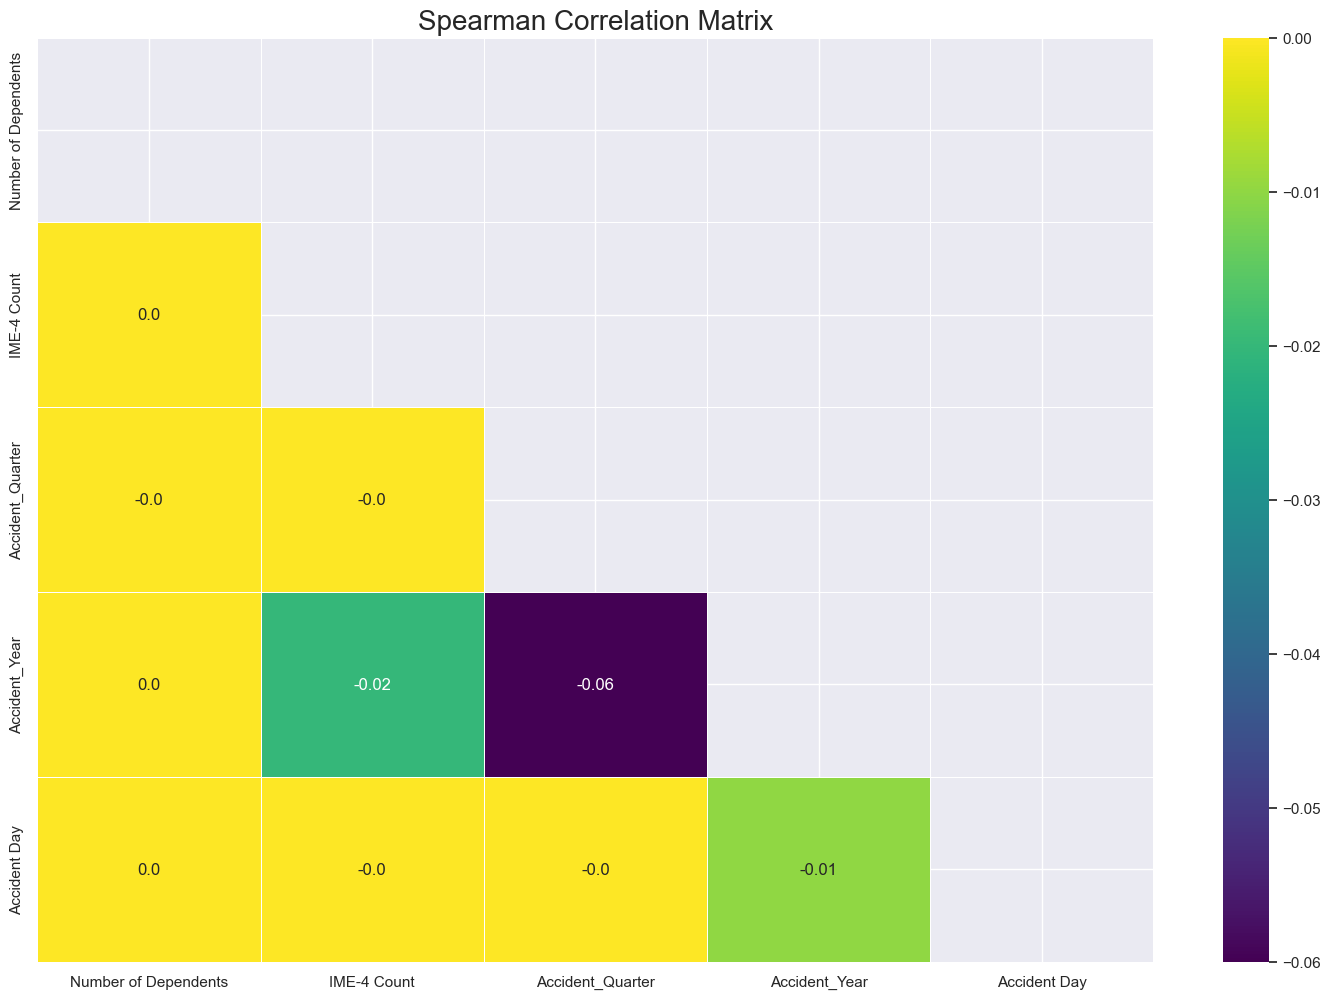

In [842]:
corr_data_numerical = X_train_num_scaled 
cor_spearman = corr_data_numerical.corr(method='spearman')

cor_heatmap(cor_spearman, 'Spearman')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

In [843]:
#fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
#obtain coef values
coef.sort_values()

Accident_Year          -0.030425
Accident_Quarter       -0.022909
Number of Dependents   -0.000000
Accident Day            0.000543
IME-4 Count             0.255480
dtype: float64

In [844]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

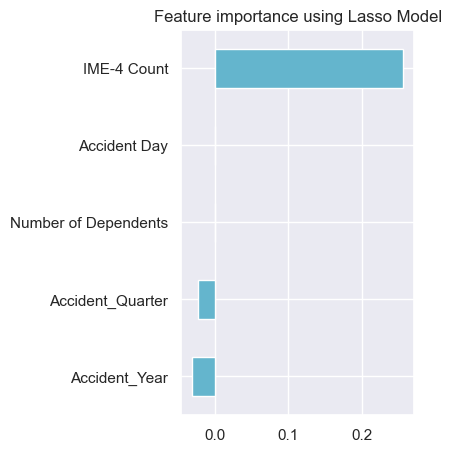

In [845]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

In [846]:
X_train_num_scaled.columns

Index(['Number of Dependents', 'IME-4 Count', 'Accident_Quarter',
       'Accident_Year', 'Accident Day'],
      dtype='object')

## o rfe demora

In [847]:
# Number of features
nof_list=np.arange(1,5)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.622433


In [848]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 4)

In [849]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train)

In [850]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Number of Dependents    False
IME-4 Count              True
Accident_Quarter         True
Accident_Year            True
Accident Day             True
dtype: bool

# rfe com SVM - esteve a correr pelo menos 9h, depois posso deixar correr um dia inteiro

In [ ]:
# #no of features
# nof_list=np.arange(1,12)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# train_score_list =[]
# val_score_list = []

# for n in range(len(nof_list)):
#     #call support vector machines classifier
#     model = SVC(kernel = 'linear')
    
#     #create RFE instance
#     rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
#     #fit and transform for training data, transform for val data
#     X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
#     X_val_rfe = rfe.transform(X_val_num_scaled)
    
#     model.fit(X_train_rfe,y_train)
    
#     #storing results on training data
#     train_score = model.score(X_train_rfe,y_train)
#     train_score_list.append(train_score)
    
#     #storing results on training data
#     val_score = model.score(X_val_rfe,y_val)
#     val_score_list.append(val_score)
    
#     #check best score
#     if(val_score > high_score):
#         high_score = val_score
#         nof = nof_list[n]
        
#         #adding mention of variables to keep
#         features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# print(f"Features to select: \n{features_to_select}")

## 7.3. Categorical Features</b> <a class="anchor" id="section_7_3"></a>
Chi-squared and MIC for the categorical ones.

 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

In [851]:
categorical_columns

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged',
 'Income_Category',
 'Age Group',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Body_Part_Category',
 'Injury_Nature_Category',
 'Injury_Cause_Category']

In [852]:
binary_columns

['Attorney/Representative',
 'COVID-19 Indicator',
 'Has_1st_Hearing_Date',
 'Accident on Weekend',
 'Alternative Dispute Resolution']

In [853]:
from sklearn.preprocessing import LabelEncoder

## for now lets use label encoder but that does not makes much more sense because we dont have an order... we need to use one hot encoder byt it will increase the dimensionality of the data

# Initialize a LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical column in training and then transform validation and test datasets
for col in categorical_columns:
    le = LabelEncoder()
    
    # Fit LabelEncoder on the training data
    X_train_processed[col] = le.fit_transform(X_train_processed[col])
    
    # Handle unseen labels in validation and test data
    # Add an "Unknown" label to classes to handle unseen labels
    le.classes_ = np.append(le.classes_, 'Unknown')

    # Replace unseen labels in validation and test data with 'Unknown'
    X_val_processed[col] = X_val_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    df_test_processed[col] = df_test_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')

    # Transform validation and test datasets using the fitted label encoder
    X_val_processed[col] = le.transform(X_val_processed[col])
    df_test_processed[col] = le.transform(df_test_processed[col])

    # Store the label encoder for future use if needed
    label_encoders[col] = le

In [854]:
categorical_columns_with_binary = categorical_columns + binary_columns
len(categorical_columns_with_binary)

22

In [855]:
categorical_columns_with_binary

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged',
 'Income_Category',
 'Age Group',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Body_Part_Category',
 'Injury_Nature_Category',
 'Injury_Cause_Category',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Has_1st_Hearing_Date',
 'Accident on Weekend',
 'Alternative Dispute Resolution']

In [856]:
#Chi-square test
threshold = 14 #we want to only keep the 10 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train_processed[categorical_columns_with_binary],y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train_processed[categorical_columns_with_binary].columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

In [857]:
names_Chi2

['Attorney/Representative',
 'Has_1st_Hearing_Date',
 'Carrier_District_Interaction',
 'Income_Category',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'Carrier Type Merged',
 'Carrier_Name_Simplified',
 'COVID-19 Indicator',
 'Age Group',
 'Medical Fee Region',
 'Alternative Dispute Resolution']

> ### Mutual Information Criterion <a class="anchor" id="sub_section_4_2_2"></a>

In [858]:
 #MIC 
threshold = 14 #we want to only keep the 10 most relevant features
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train_processed[categorical_columns_with_binary],y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train_processed[categorical_columns_with_binary].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)

In [859]:
names_MIC

['Attorney/Representative',
 'Has_1st_Hearing_Date',
 'Income_Category',
 'WCIO Part Of Body Code',
 'WCIO Nature of Injury Code',
 'WCIO Cause of Injury Code',
 'Body_Part_Category',
 'Carrier_Name_Simplified',
 'Injury_Cause_Category',
 'Industry Code',
 'Injury_Nature_Category',
 'Carrier_District_Interaction',
 'Carrier Type Merged',
 'District Name']

In [860]:
common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))
features_selected = common_categorical_features

In [861]:
features_selected

['WCIO Cause of Injury Code',
 'Carrier_District_Interaction',
 'WCIO Part Of Body Code',
 'Has_1st_Hearing_Date',
 'Carrier_Name_Simplified',
 'WCIO Nature of Injury Code',
 'Industry Code',
 'Carrier Type Merged',
 'Attorney/Representative',
 'Income_Category']

## 7.4. Final Features</b> <a class="anchor" id="section_7_4"></a>

Make that beautiful table, where we say in which case we reject each variable and then the final decision


| Predictor                | Spearman | Lasso  | RFE LR | RFE SVM | What to do? (One possible way to "solve")              |
|--------------------------|----------|--------|--------|---------|--------------------------------------------------------|
| Number of Dependents     | Discard  | Discard | Discard|         | Discard                                                |
| IME-4 Count              | Keep     | Keep   | Keep   |         | Include in the model                                   |
| Accident_Quarter         | Keep     | Discard | Keep   |         | Consider including if adds value                       |
| Accident_Year            | Keep     | Discard | Keep   |         | Include in the model                                   |
| Accident Day             | Keep     | Keep   | Keep   |         | Include in the model                                   

| Predictor                    | Chi-Square | MIC     | What to do? (One possible way to "solve")              |
|-----------------------------|------------|---------|--------------------------------------------------------|
| Carrier_Name_Simplified     | Keep       | Keep    | Include in the model                                   |
| County of Injury            | Keep       | Discard | Consider including if adds value                       |
| District Name               | Discard    | Keep    | Consider including if adds value                       |
| Gender                      | Discard    | Keep    | Consider including if adds value                       |
| Medical Fee Region          | Keep       | Keep    | Include in the model                                   |
| Carrier_District_Interaction| Keep       | Keep    | Include in the model                                   |
| Zip Code Region             | Discard    | Discard | Discard                                                |
| Carrier Type Merged         | Keep       | Keep    | Include in the model                                   |
| Income_Category             | Keep       | Keep    | Include in the model                                   |
| Age Group                   | Keep       | Keep    | Include in the model                                   |
| Attorney/Representative     | Keep       | Keep    | Include in the model                                   |
| COVID-19 Indicator          | Keep       | Discard | Consider including if adds value                       |
| Has_1st_Hearing_Date        | Keep       | Keep    | Include in the model                                   |
| Accident on Weekend         | Discard    | Discard | Discard                                                |
| Alternative Dispute Resolution | Keep    | Discard | Consider including if adds value                       |
| WCIO Cause of Injury Code   | Keep       | Keep    | Include in the model                                   |
| WCIO Nature of Injury Code  | Keep       | Keep    | Include in the model                                   |
| WCIO Part Of Body Code      | Keep       | Keep    | Include in the model                                   |
| Body_Part_Category          | Keep       | Keep    | Include in the model                                   |
| Injury_Nature_Category      | Discard    | Keep    | Consider including if adds value                       |
| Injury_Cause_Category       | Discard    | Keep    | Consider including if adds value                       |

In [863]:
# 1. `final_features_df` for final selected features
# 2. `potential_value_df` for features that are potentially valuable

# Defining the lists of features based on the provided decisions
final_features = [
    "Carrier_Name_Simplified",
    "Medical Fee Region",
    "Carrier_District_Interaction",
    "Carrier Type Merged",
    "Income_Category",
    "Age Group",
    'WCIO Part Of Body Code',
    'WCIO Nature of Injury Code',
    'WCIO Cause of Injury Code',
    "Attorney/Representative",
    "Has_1st_Hearing_Date",
    "Body_Part_Category",
    "Industry Code",
    "IME-4 Count",
    "Accident_Year",
    "Accident Day"
]

potential_value_features = [
    "County of Injury",
    "District Name",
    "Gender",
    'promptness_category',
    "COVID-19 Indicator",
    "Alternative Dispute Resolution",
    "Injury_Nature_Category",
    "Injury_Cause_Category",
    "Accident_Quarter"
]

# Selecting final features
final_features_X_train = X_train_processed[final_features]
    
# Selecting features with potential value
potential_value_X_train = X_train_processed[final_features + potential_value_features]

# Same for validation
# Selecting final features
final_features_X_val = X_val_processed[final_features]
    
# Selecting features with potential value
potential_value_X_val = X_val_processed[final_features + potential_value_features]

# Same for test
# Selecting final features
final_features_df_test  = df_test_processed[final_features]
    
# Selecting features with potential value
potential_value_df_test = df_test_processed[final_features + potential_value_features]

# 8. Modeling <a class="anchor" id="chapter8"></a>


> ### Logistic  Regression

In [864]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to print metrics and plot a colorful confusion matrix
def metrics(y_train, pred_train, y_val, pred_val):
    # Print classification report for training data
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    train_cm = confusion_matrix(y_train, pred_train)
    print(train_cm)
    
    # Plot confusion matrix for training data
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Print classification report for validation data
    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    val_cm = confusion_matrix(y_val, pred_val)
    print(val_cm)

    # Plot confusion matrix for validation data
    plt.subplot(1, 2, 2)
    sns.heatmap(val_cm, annot=True, cmap='Oranges', fmt='d', cbar=False)
    plt.title('Validation Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Show the plots
    plt.tight_layout()
    plt.show()



In [556]:
y_train

array([2, 3, 1, ..., 3, 3, 3])

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.11      0.01      0.01      8734
           1       0.70      0.95      0.80    203754
           2       0.27      0.01      0.02     48234
           3       0.55      0.55      0.55    103955
           4       0.46      0.22      0.30     33796
           5       0.00      0.00      0.00      2948
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00       329

    accuracy                           0.64    401818
   macro avg       0.26      0.22      0.21    401818
weighted avg       0.57      0.64      0.58    401818

[[    47   7397    105   

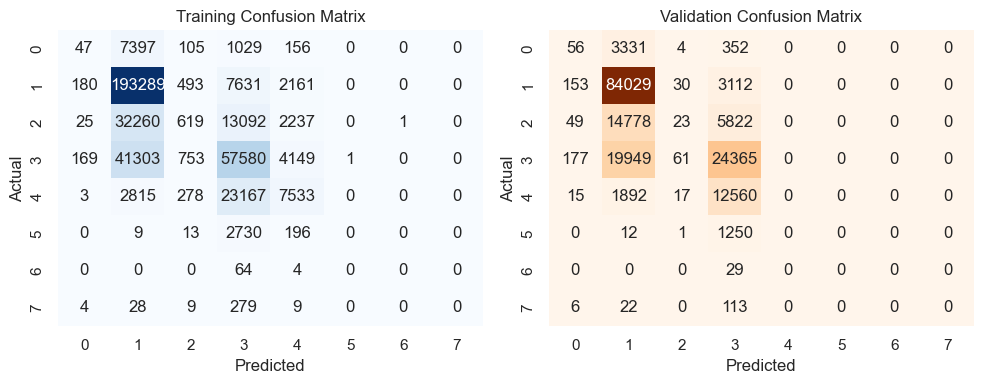

In [865]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Metrics for Logistic Regression
log_reg.fit(final_features_X_train, y_train)
pred_train_log_final = log_reg.predict(final_features_X_train)
pred_val_log_final = log_reg.predict(final_features_X_val)
metrics(y_train, pred_train_log_final, y_val, pred_val_log_final)

In [866]:
# Predict on the test set with the best model
y_test_pred_best = log_reg.predict(final_features_df_test)

# Decode the predictions if necessary
y_test_pred_best_decoded = label_encoder.inverse_transform(y_test_pred_best)

# Prepare the submission DataFrame
test_predictions_df_log = pd.DataFrame({
    'Claim Identifier': df_test_processed.index, 
    'Claim Injury Type': y_test_pred_best_decoded  
})

In [867]:
# Define a dictionary to map the injury types to numeric codes
injury_type_mapping = {
    'NON-COMP': '2. NON-COMP',
    'TEMPORARY': '4. TEMPORARY',
    'PPD SCH LOSS': '5. PPD SCH LOSS',
    'MED ONLY': '3. MED ONLY',
    'CANCELLED': '1. CANCELLED',
    'PPD NSL': '6. PPD NSL',
    'DEATH': '8. DEATH',
    'PTD': '7. PTD'
}

# Replace the injury types with numeric codes in the 'Claim Injury Type' column
test_predictions_df_log['Claim Injury Type'] = test_predictions_df_log['Claim Injury Type'].replace(injury_type_mapping)

# Verify the result
print(test_predictions_df_log['Claim Injury Type'].value_counts())

2. NON-COMP     343657
4. TEMPORARY     39814
3. MED ONLY       4397
1. CANCELLED       107
Name: Claim Injury Type, dtype: int64


In [868]:
# Save to CSV for Kaggle
test_predictions_df_log.to_csv('kaggle_submission_predictions_log_classweigths.csv', index=False)

#Path para o Kaggle
#/Users/nunobernardino/Documents/GitHub/Machine_Learning_project

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.00      0.01      8734
           1       0.69      0.95      0.80    203754
           2       0.32      0.01      0.01     48234
           3       0.54      0.52      0.53    103955
           4       0.47      0.25      0.33     33796
           5       0.00      0.00      0.00      2948
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00       329

    accuracy                           0.64    401818
   macro avg       0.27      0.22      0.21    401818
weighted avg       0.57      0.64      0.57    401818

[[    26   7293      8   

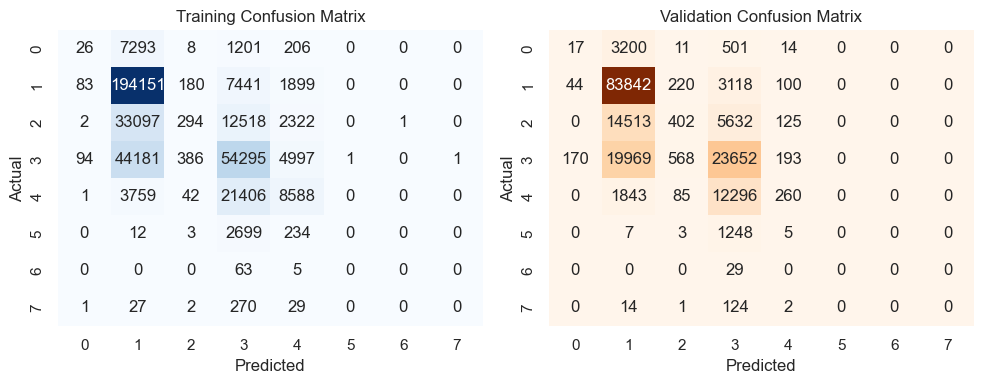

In [558]:
# Fit model with final features and potential value features
log_reg.fit(potential_value_X_train, y_train)
y_pred_log_potential = log_reg.predict(potential_value_X_val)

log_reg.fit(potential_value_X_train, y_train)
pred_train_log_potential = log_reg.predict(potential_value_X_train)
pred_val_log_potential = log_reg.predict(potential_value_X_val)
metrics(y_train, pred_train_log_potential, y_val, pred_val_log_potential)

> ### Decision Trees 

In [559]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

# Fit model with final features
dt.fit(final_features_X_train, y_train)
y_pred_dt_final = dt.predict(final_features_X_val)

# Metrics for Decision Tree
dt.fit(final_features_X_train, y_train)
pred_train_dt_final = dt.predict(final_features_X_train)
pred_val_dt_final = dt.predict(final_features_X_val)
metrics(y_train, pred_train_dt_final, y_val, pred_val_dt_final)

KeyboardInterrupt: 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8684
           1       1.00      1.00      1.00       319
           2       1.00      1.00      1.00     47902
           3       1.00      1.00      1.00    203272
           4       1.00      1.00      1.00      2931
           5       1.00      1.00      1.00     33246
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00    103591

    accuracy                           1.00    400011
   macro avg       1.00      1.00      1.00    400011
weighted avg       1.00      1.00      1.00    400011

[[  8684      0      0   

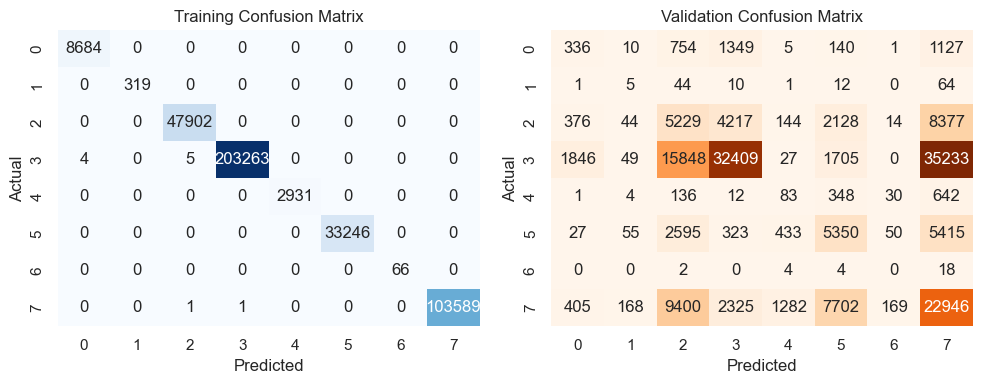

In [ ]:
# Fit model with final features and potential value features
dt.fit(potential_value_X_train, y_train)
y_pred_dt_potential = dt.predict(potential_value_X_val)

dt.fit(potential_value_X_train, y_train)
pred_train_dt_potential = dt.predict(potential_value_X_train)
pred_val_dt_potential = dt.predict(potential_value_X_val)
metrics(y_train, pred_train_dt_potential, y_val, pred_val_dt_potential)

Fit Decision Tree model with pruning parameters for final features and potential value features since we have overfitting

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.19      0.28      8684
           1       0.00      0.00      0.00       319
           2       0.45      0.06      0.10     47902
           3       0.72      0.94      0.81    203272
           4       0.00      0.00      0.00      2931
           5       0.63      0.47      0.53     33246
           6       0.00      0.00      0.00        66
           7       0.58      0.56      0.57    103591

    accuracy                           0.67    400011
   macro avg       0.36      0.28      0.29    400011
weighted avg       0.63      0.67      0.62    400011

[[  1627      0    161   

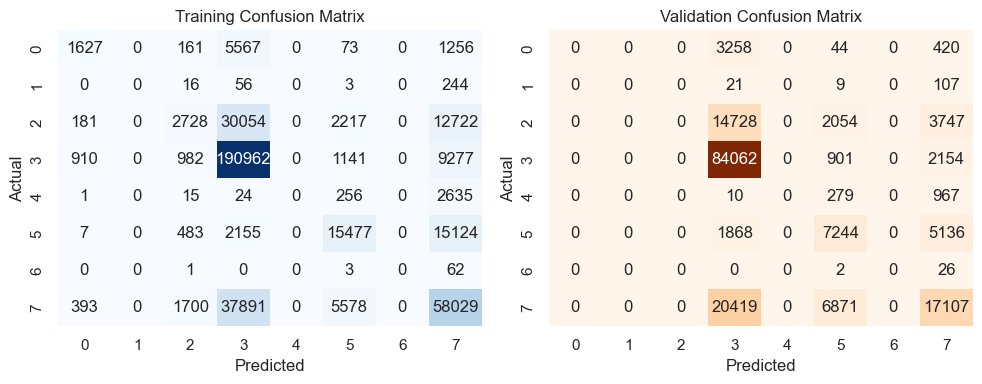

In [ ]:
# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Fit pruned Decision Tree model with final features and calculate metrics for training and validation
pruned_dt.fit(final_features_X_train, y_train)
pred_train_dt_final = pruned_dt.predict(final_features_X_train)
pred_val_dt_final = pruned_dt.predict(final_features_X_val)
metrics(y_train, pred_train_dt_final, y_val, pred_val_dt_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.03      0.05      8684
           1       0.00      0.00      0.00       319
           2       0.51      0.06      0.11     47902
           3       0.78      0.97      0.86    203272
           4       0.00      0.00      0.00      2931
           5       0.63      0.51      0.56     33246
           6       0.00      0.00      0.00        66
           7       0.67      0.73      0.70    103591

    accuracy                           0.73    400011
   macro avg       0.39      0.29      0.29    400011
weighted avg       0.69      0.73      0.68    400011

[[   243      0    100   

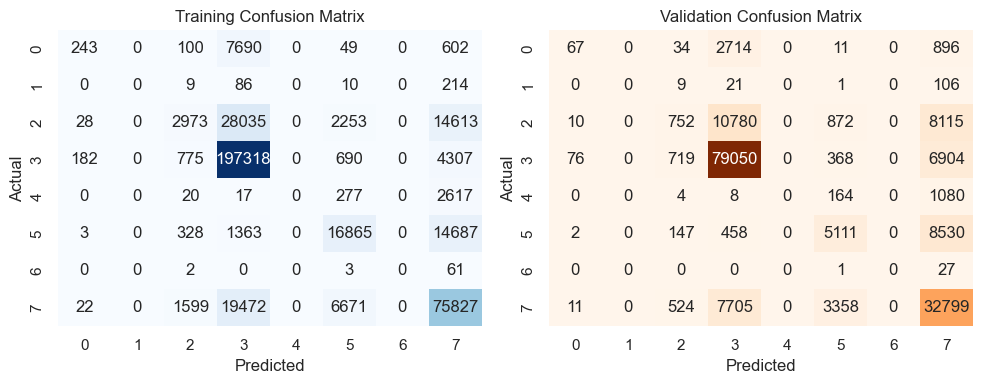

In [ ]:
# Fit pruned Decision Tree model with potential value features and calculate metrics for training and validation
pruned_dt.fit(potential_value_X_train, y_train)
pred_train_dt_potential = pruned_dt.predict(potential_value_X_train)
pred_val_dt_potential = pruned_dt.predict(potential_value_X_val)
metrics(y_train, pred_train_dt_potential, y_val, pred_val_dt_potential)

> ### Random forest

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.15      0.24      8684
           1       0.00      0.00      0.00       319
           2       0.52      0.04      0.07     47902
           3       0.71      0.95      0.81    203272
           4       0.00      0.00      0.00      2931
           5       0.67      0.43      0.52     33246
           6       0.00      0.00      0.00        66
           7       0.58      0.58      0.58    103591

    accuracy                           0.67    400011
   macro avg       0.39      0.27      0.28    400011
weighted avg       0.64      0.67      0.62    400011

[[  1316      0     81   

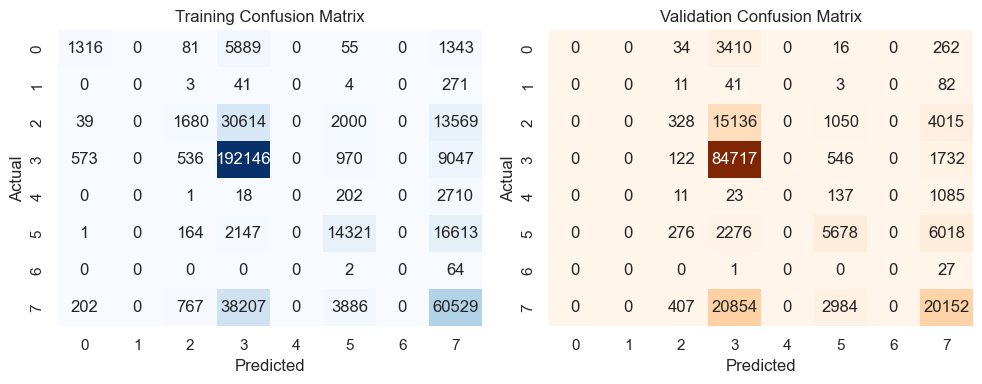

In [ ]:
# Fit Random Forest model with final features and potential value features
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit Random Forest model with final features and calculate metrics for training and validation
rf.fit(final_features_X_train, y_train)
pred_train_rf_final = rf.predict(final_features_X_train)
pred_val_rf_final = rf.predict(final_features_X_val)
metrics(y_train, pred_train_rf_final, y_val, pred_val_rf_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.00      0.01      8684
           1       0.00      0.00      0.00       319
           2       0.76      0.01      0.03     47902
           3       0.76      0.97      0.85    203272
           4       0.00      0.00      0.00      2931
           5       0.71      0.40      0.51     33246
           6       0.00      0.00      0.00        66
           7       0.64      0.74      0.69    103591

    accuracy                           0.72    400011
   macro avg       0.46      0.27      0.26    400011
weighted avg       0.72      0.72      0.66    400011

[[    40      0      9   

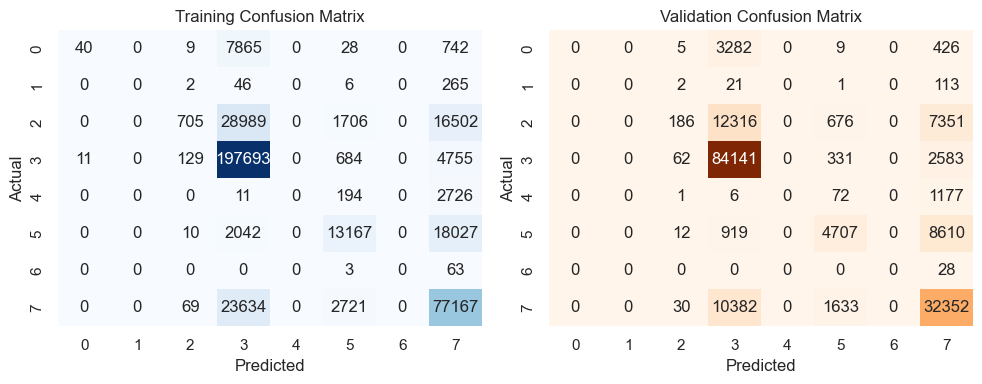

In [ ]:
# Fit Random Forest model with potential value features and calculate metrics for training and validation
rf.fit(potential_value_X_train, y_train)
pred_train_rf_potential = rf.predict(potential_value_X_train)
pred_val_rf_potential = rf.predict(potential_value_X_val)
metrics(y_train, pred_train_rf_potential, y_val, pred_val_rf_potential)

> ### Decision Tree with CV

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Perform 5-fold cross-validation on the training set for Decision Tree
dt_scores = cross_val_score(pruned_dt, final_features_X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_scores.mean()}")

Decision Tree Cross-Validation Accuracy: 0.6676916363655163


In [ ]:
# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Perform 5-fold cross-validation on the training set for Decision Tree
dt_scores = cross_val_score(pruned_dt, potential_value_X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_scores.mean()}")

Decision Tree Cross-Validation Accuracy: 0.7285999641004313


> ### Neural network

In [ ]:
!pip install keras



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install tensorflow --upgrade

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 818.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.2/390.2 MB 3.1 MB/s eta 0:02:05
   ---------------------------------------- 0.3/390.2 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.4/390.2 MB 2.8 MB/s eta 0:02:22
   ---------------------------------------- 0.6/390.2 MB 3.0 MB/s eta 0:02:11
   ---------------------------------------- 0.7/390.2 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.8/390.2 MB 2.8 MB/s eta 0:02:18
   ---

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 af380d326e146f2d184a940ccf8350e9b6dc06a0530bfaa3a557b73819c4017b
             Got        0e6b569d88e4f16d7205c29429c733310f10e7e74cfb0a3017893135501ccece


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

unique_classes = np.unique(y_train)
print(f"Unique Classes in y_train: {unique_classes}")


Unique Classes in y_train: [0 1 2 3 4 5 6 7]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Define a neural network model for multi-class classification
model = Sequential()
model.add(Dense(32, input_dim=final_features_X_train.shape[1], activation='relu'))  # First hidden layer with 32 neurons
model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))  # third hidden layer with 16 neurons
model.add(Dense(8, activation='softmax'))  # Output layer with 5 units for 5 classes

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model on the training data
model.fit(final_features_X_train, y_train, epochs=20, batch_size=32, validation_data=(final_features_X_val, y_val), verbose=1, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(final_features_X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/20
12501/12501 [==============================] - 44s 3ms/step - loss: 1.1388 - accuracy: 0.6026 - val_loss: 1.1090 - val_accuracy: 0.6274
Epoch 2/20
12501/12501 [==============================] - 43s 3ms/step - loss: 1.0051 - accuracy: 0.6352 - val_loss: 1.1148 - val_accuracy: 0.6222
Epoch 3/20
12501/12501 [==============================] - 46s 4ms/step - loss: 0.9908 - accuracy: 0.6402 - val_loss: 1.0336 - val_accuracy: 0.6241
Epoch 4/20
12501/12501 [==============================] - 28s 2ms/step - loss: 0.9818 - accuracy: 0.6444 - val_loss: 1.0540 - val_accuracy: 0.6220
Epoch 5/20
12501/12501 [==============================] - 23s 2ms/step - loss: 0.9755 - accuracy: 0.6466 - val_loss: 1.0641 - val_accuracy: 0.6219
Epoch 6/20
12501/12501 [==============================] - 24s 2ms/step - loss: 0.9708 - accuracy: 0.6480 - val_loss: 1.1125 - val_accuracy: 0.6274
Epoch 7/20
12501/12501 [==============================] - 24s 2ms/step - loss: 0.9675 - accuracy: 0.6489 - val_loss: 1